# <center>Trabajo Práctico 1 : Reservas de Hotel</center>

### <center>Grupo 30. Integrantes: Tomás Iglesias, Valentín González, Leonardo Cruz <center>



# Análisis exploratorio de los datos

In [ ]:
# Imports para el notebook
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st

from sklearn.ensemble import IsolationForest

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
hotels_train_url = "https://raw.githubusercontent.com/IglesiasT/7506R-1C2023-GRUPO30/main/data/hotels_train.csv"
df = pd.read_csv(hotels_train_url)
df_copia = df.copy()  # Trabajamos con una copia del df para evitar cambios no deseados en los datos originales

In [ ]:
df_copia.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [ ]:
df_copia.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'id',
 'is_canceled']

In [ ]:
cantidad_registros, cantidad_columnas = df_copia.shape
print(f"El dataset contiene {cantidad_registros} registros y {cantidad_columnas} columnas")

El dataset contiene 61913 registros y 32 columnas


Ejemplo de un campo del dataset:

In [ ]:
df_copia.loc[0]

hotel                                                       City Hotel
lead_time                                                           49
arrival_date_year                                                 2016
arrival_date_month                                           September
arrival_date_week_number                                            37
arrival_date_day_of_month                                            5
stays_in_weekend_nights                                              1
stays_in_week_nights                                                 2
adults                                                               1
children                                                           0.0
babies                                                               0
meal                                                                BB
country                                                            USA
market_segment                                               Online TA
distri

In [ ]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

**Variables cuantitativas:**


*   lead_time
*   arrival_date_year
*   arrival_date_week_number (?)
*   arrival_date_day_of_month (?):
*   stays_in_weekend_nights
*   stays_in_week_nights
*   adults
*   children
*   babies
*   booking_changes
*   previous_cancellations
*   previous_bookings_not_canceled
*   days_in_waiting_list 
*   adr
*   required_car_parking_spaces
*   total_of_special_requests













**Variables cualitativas:**


*   hotel
*   arrival_date_month
*   meal
*   country
*   market_segment
*   distribution_channel
*   is_repeated_guest
*   reserved_room_type
*   assigned_room_type
*   deposit_type
*   agent
*   company
*   customer_type

**Otras:**


*   reservation_status_date
*   id



##Análisis inicial de las variables

Primero realizamos cambios a algunos nombres de las variables para trabajar de manera más cómoda:

In [ ]:
df_copia = df_copia.rename(columns = {'arrival_date_month' : 'arrival_month'})
df_copia = df_copia.rename(columns = {'arrival_date_year' : 'arrival_year'})
df_copia = df_copia.rename(columns = {'arrival_date_week_number' : 'arrival_week'})
df_copia = df_copia.rename(columns = {'arrival_date_day_of_month' : 'arrival_day_month'})

df_copia = df_copia.rename(columns = {'stays_in_week_nights' : 'week_nights'})
df_copia = df_copia.rename(columns = {'stays_in_weekend_nights' : 'weekend_nights'})

df_copia = df_copia.rename(columns = {'required_car_parking_spaces' : 'parking_spaces'})

df_copia = df_copia.rename(columns = {'total_of_special_requests' : 'special_requests'})

Realizamos algunos cambios en el formato de las variables:

In [ ]:
df_copia['arrival_year'] = df_copia['arrival_year'].astype(int)

### Análisis de las variables cuantitativas

In [ ]:
# describe() obtiene el análisis de todas las variables numéricas, incluyendo las cualitativas. Pido el análisis para todas menos las cualitativas.
variables_cuantitativas = df_copia[['lead_time','arrival_year','arrival_week','arrival_day_month','weekend_nights','week_nights','adults','children','babies','booking_changes', 'previous_cancellations','previous_bookings_not_canceled','days_in_waiting_list','adr','parking_spaces','special_requests']]
variables_cuantitativas.describe()   # TODO: filtrar el resultado de describe

,lead_time,arrival_year,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,babies,booking_changes,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,parking_spaces,special_requests
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.195952,0.114790,0.115420,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.610519,0.993723,1.396359,18.619092,47.757640,0.221023,0.775412
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,17.000000,26.000000,70.000000,391.000000,510.000000,8.000000,5.000000


###Análisis de las variables cualitativas


In [ ]:
variables_cualitativas = df_copia[['hotel','arrival_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type',]]
variables_cualitativas.describe(include = 'all')

,hotel,arrival_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type
count,61913,61913,61913,61692,61913,61913,61913.000000,61913,61913,61913,54023.000000,3152.000000,61913
unique,2,12,5,149,8,5,NaN,10,12,3,NaN,NaN,4
top,City Hotel,August,BB,PRT,Online TA,TA/TO,NaN,A,A,No Deposit,NaN,NaN,Transient
freq,42129,7176,47837,27950,29269,51849,NaN,45134,40007,51685,NaN,NaN,47449
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.027991,NaN,NaN,NaN,84.541010,188.539340,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.164948,NaN,NaN,NaN,109.523772,129.457025,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,9.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,9.000000,67.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,12.000000,179.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,208.000000,270.000000,NaN


Aca analizamos los diferentes valores que pueden tomar algunas de las variables cualitativas:

In [ ]:
columna = df_copia['meal']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64


Hay 5 diferentes valores únicos en la variable meal


In [ ]:
columna = df_copia['arrival_month']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_month, dtype: int64


Hay 12 diferentes valores únicos en la variable arrival_month


In [ ]:
columna = df_copia['distribution_channel']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64


Hay 5 diferentes valores únicos en la variable distribution_channel


In [ ]:
columna = df_copia['market_segment']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64


Hay 8 diferentes valores únicos en la variable market_segment


In [ ]:
columna = df_copia['reserved_room_type']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")
print('\n')
columna = df_copia['assigned_room_type']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64


Hay 10 diferentes valores únicos en la variable reserved_room_type


A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64


Hay 12 diferentes valores únicos en la variable assigned_room_type


In [ ]:
columna = df_copia['country']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")
print(f"Cantidad de companias con un solo registro: {(columna.value_counts() == 1).sum()}")

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64


Hay 149 diferentes valores únicos en la variable country
Cantidad de companias con un solo registro: 21


In [ ]:
columna = df_copia['agent']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")
print(f"Cantidad de companias con un solo registro: {(columna.value_counts() == 1).sum()}")

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
         ...  
420.0        1
352.0        1
450.0        1
283.0        1
25.0         1
Name: agent, Length: 296, dtype: int64


Hay 296 diferentes valores únicos en la variable agent
Cantidad de companias con un solo registro: 54


In [ ]:
columna = df_copia['company']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")
print(f"Cantidad de companias con un solo registro: {(columna.value_counts() == 1).sum()}")

40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
        ... 
305.0      1
275.0      1
461.0      1
220.0      1
160.0      1
Name: company, Length: 276, dtype: int64


Hay 276 diferentes valores únicos en la variable company
Cantidad de companias con un solo registro: 78


In [ ]:
columna = df_copia['deposit_type']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64


Hay 3 diferentes valores únicos en la variable deposit_type


In [ ]:
columna = df_copia['customer_type']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64


Hay 4 diferentes valores únicos en la variable customer_type


## Distribución de las variables

####A continuación analizaremos los gráficos de distribución de algunas variables cuantitativas que valen la pena analizar:



---



[Text(0.5, 1.0, 'Distribucion de la variable arrival_year'),
 Text(0.5, 0, 'Arrival year')]

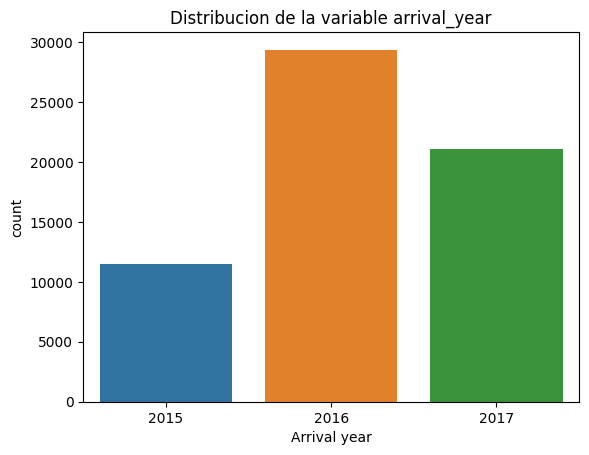

In [ ]:
sns.countplot(data = df_copia, x = "arrival_year").set(title = "Distribucion de la variable arrival_year", xlabel = "Arrival year")



---



[Text(0.5, 1.0, 'Boxplot variable arrival_day_month'),
 Text(0, 0.5, 'Arrival day month')]

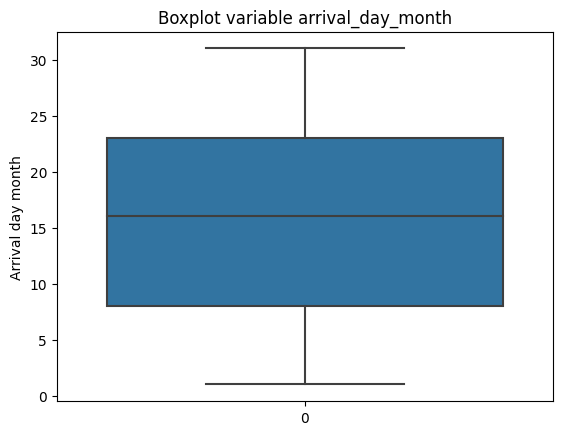

In [ ]:
sns.boxplot(df_copia['arrival_day_month']).set(title = 'Boxplot variable arrival_day_month',ylabel = 'Arrival day month')



---



[Text(0.5, 1.0, 'Boxplot variable arrival_week '),
 Text(0, 0.5, 'Arrival week ')]

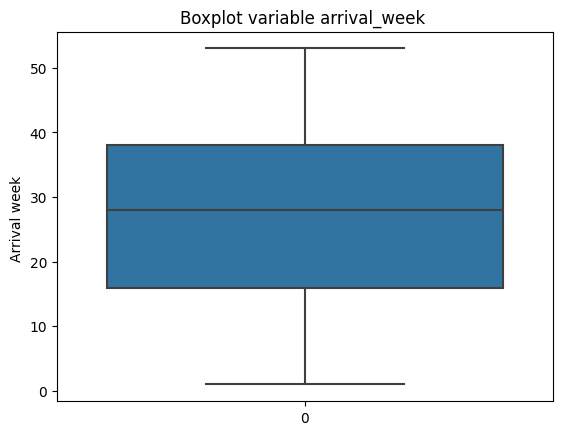

In [ ]:
sns.boxplot(df_copia['arrival_week']).set(title = 'Boxplot variable arrival_week ',ylabel = 'Arrival week ')



---



[Text(0.5, 1.0, 'Boxplot variable adr'), Text(0, 0.5, 'ADR')]

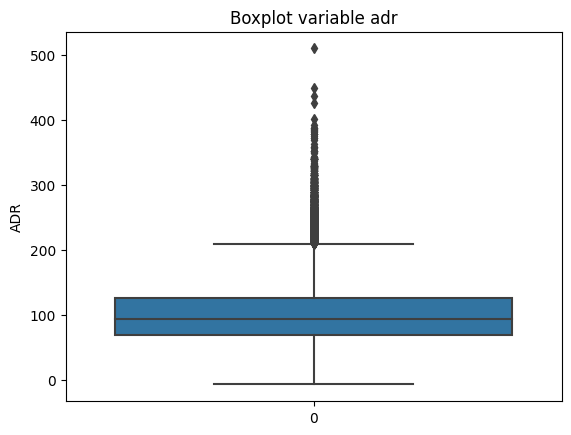

In [ ]:
sns.boxplot(df_copia['adr']).set(title = 'Boxplot variable adr',ylabel = 'ADR')

Esta variable presenta muchos outliers, que serán analizados más abajo.

---



[Text(0.5, 1.0, 'Boxplot variable lead_time'), Text(0, 0.5, 'Lead time')]

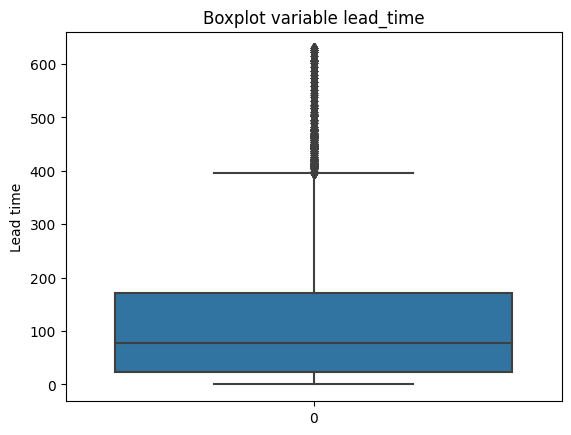

In [ ]:
sns.boxplot(df_copia['lead_time']).set(title = 'Boxplot variable lead_time', ylabel = 'Lead time')

Esta variable también presenta muchos outliers.

---



[Text(0.5, 1.0, 'Boxplot variable week_nights'), Text(0, 0.5, 'Week nights')]

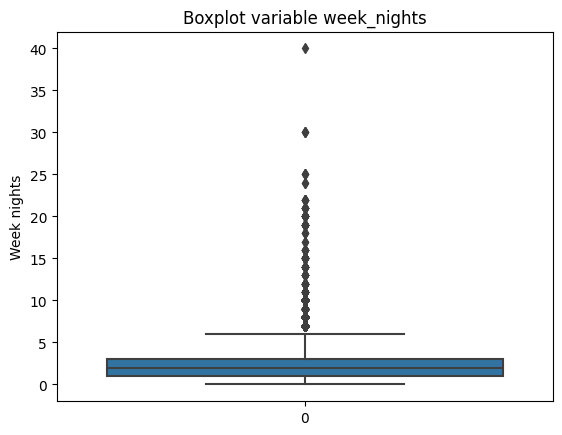

In [ ]:
sns.boxplot(df_copia['week_nights']).set(title = 'Boxplot variable week_nights', ylabel = 'Week nights')



---



[Text(0.5, 1.0, 'Boxplot variable weekend_nights'),
 Text(0, 0.5, 'Weekend nigths')]

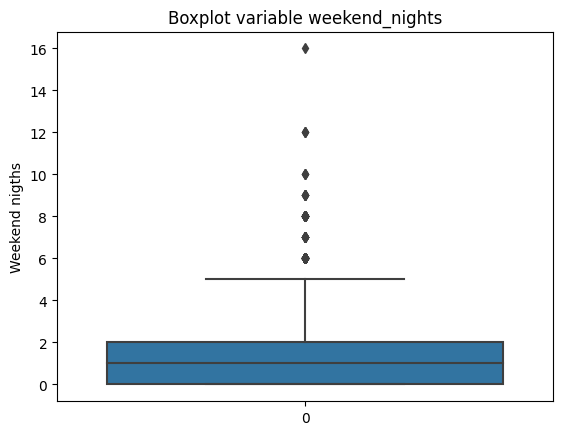

In [ ]:
sns.boxplot(df_copia['weekend_nights']).set(title = 'Boxplot variable weekend_nights', ylabel = 'Weekend nigths')



---



[Text(0.5, 1.0, 'Distribucion de la variable adults'), Text(0.5, 0, 'Adults')]

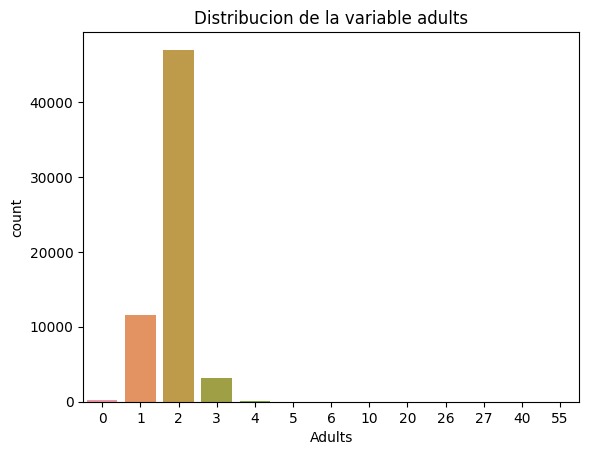

In [ ]:
sns.countplot(data = df_copia, x = "adults").set(title = "Distribucion de la variable adults", xlabel = "Adults")



---



[Text(0.5, 1.0, 'Distribucion de la variable children'),
 Text(0.5, 0, 'Children')]

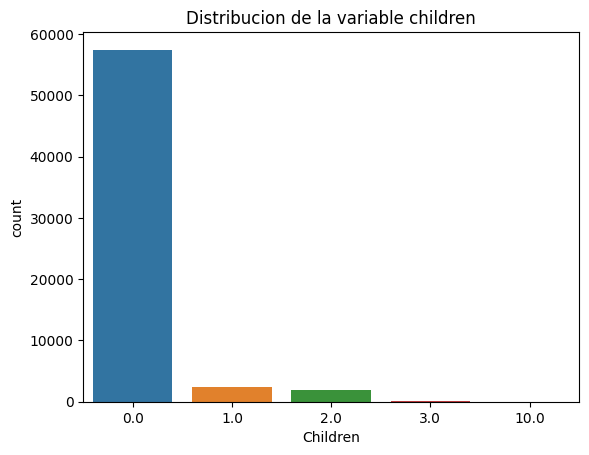

In [ ]:
sns.countplot(data = df_copia, x = "children").set(title = "Distribucion de la variable children", xlabel = "Children")



---



[Text(0.5, 1.0, 'Distribucion de la variable babies'), Text(0.5, 0, 'Babies')]

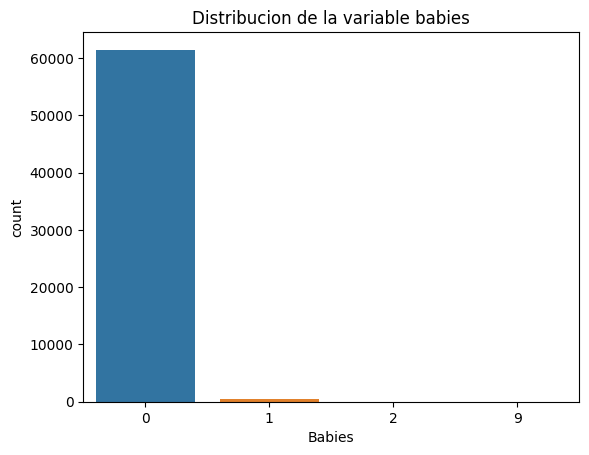

In [ ]:
sns.countplot(data = df_copia, x = "babies").set(title = "Distribucion de la variable babies", xlabel = "Babies")



---



[Text(0.5, 1.0, 'Distribucion de la variable previous_cancellations'),
 Text(0.5, 0, 'Previous cancellations')]

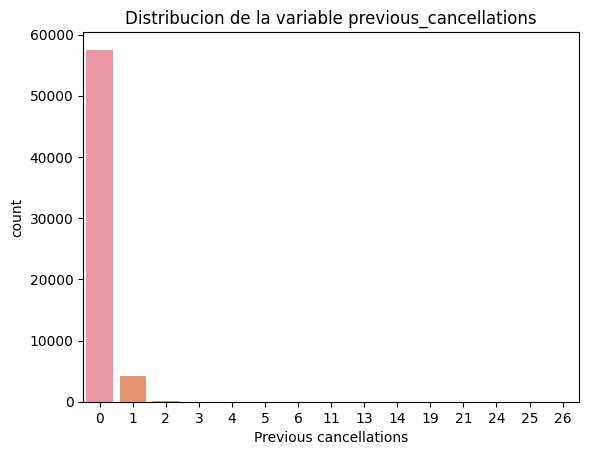

In [ ]:
sns.countplot(data = df_copia, x = "previous_cancellations").set(title = "Distribucion de la variable previous_cancellations", xlabel = "Previous cancellations")


Un altísimo porcentaje de los clientes no realizaron ninguna cancelación previa.

---




[Text(0.5, 1.0, 'Boxplot variable previous_bookings_not_canceled'),
 Text(0, 0.5, 'Previous bookings not canceled')]

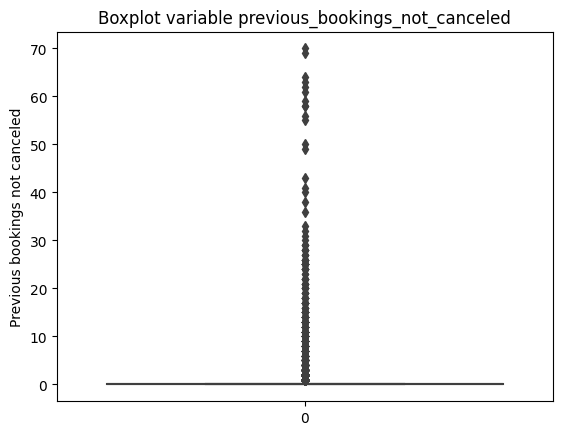

In [ ]:
#plt.figure(figsize=(18,5))
#sns.countplot(data = df_copia, x = "previous_bookings_not_canceled").set(title = "Distribucion de la variable previous_bookings_not_canceled", xlabel = "Previous bookings not canceled")
sns.boxplot(df_copia['previous_bookings_not_canceled']).set(title = 'Boxplot variable previous_bookings_not_canceled', ylabel = 'Previous bookings not canceled')

En este gráfico podemos ver que la media se ajusta en el 0 y por ende hay muchos outliers.

---



[Text(0.5, 1.0, 'Distribucion de la variable booking_changes'),
 Text(0.5, 0, 'Booking changes')]

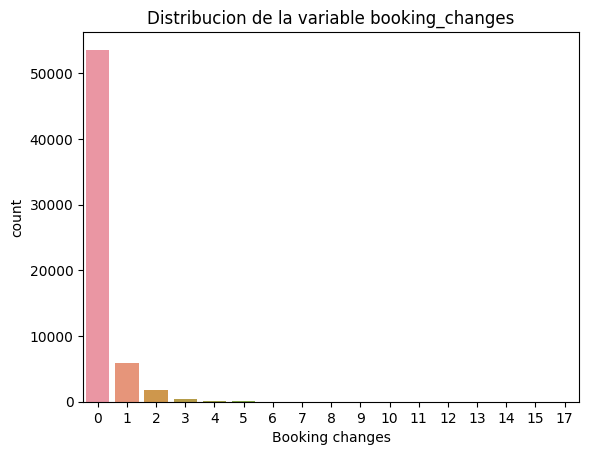

In [ ]:
sns.countplot(data = df_copia, x = "booking_changes").set(title = "Distribucion de la variable booking_changes", xlabel = "Booking changes")



---



[Text(0.5, 1.0, 'Distribucion de la variable parking_spaces'),
 Text(0.5, 0, 'Parking Spaces')]

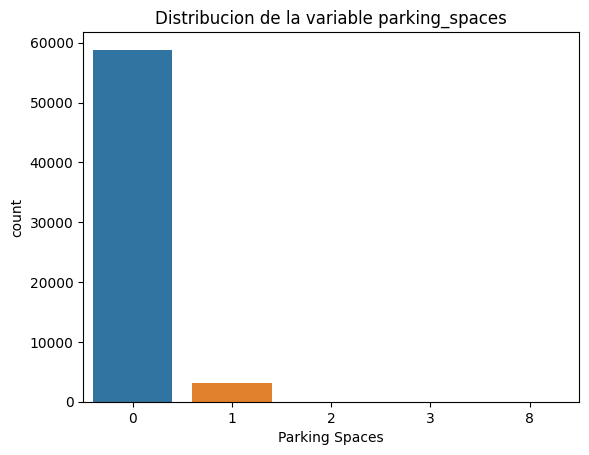

In [ ]:
sns.countplot(data = df_copia, x = "parking_spaces").set(title = "Distribucion de la variable parking_spaces", xlabel = "Parking Spaces")



---



[Text(0.5, 1.0, 'Distribucion de la variable special_requests'),
 Text(0.5, 0, 'Special requests')]

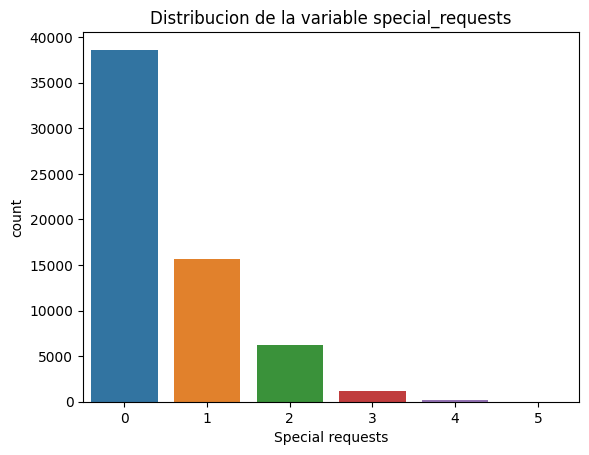

In [ ]:
sns.countplot(data = df_copia, x = "special_requests").set(title = "Distribucion de la variable special_requests", xlabel = "Special requests")



---



---



####Ahora toca analizar los gráficos de distribución de las variables cualitativas:

[Text(0.5, 1.0, 'Distribucion de la variable hotel'), Text(0.5, 0, 'Hotel')]

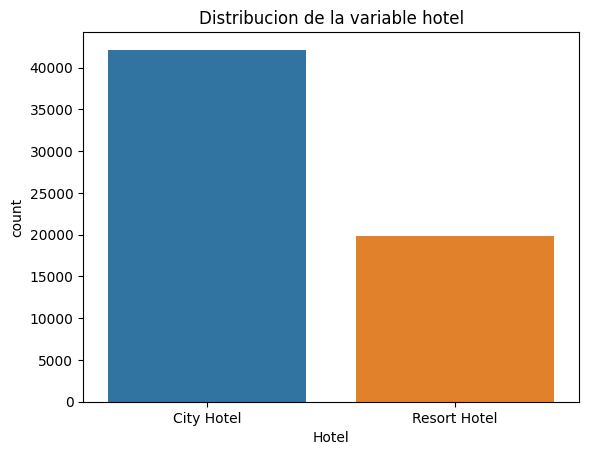

In [ ]:
sns.countplot(data = df_copia, x = "hotel").set(title = "Distribucion de la variable hotel", xlabel = "Hotel")



---



[Text(0.5, 1.0, 'Distribucion de la variable meal'), Text(0.5, 0, 'Meal')]

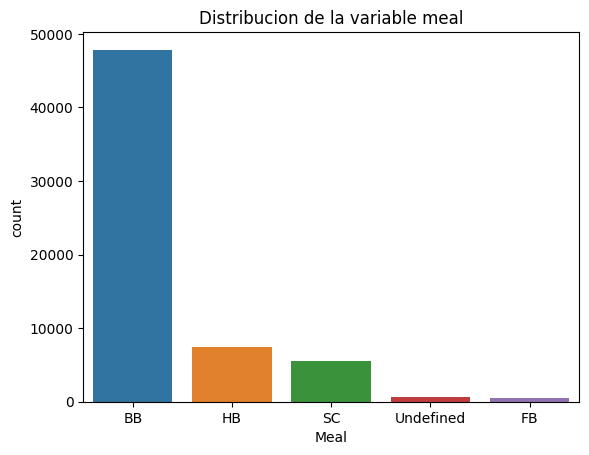

In [ ]:
sns.countplot(data = df_copia, x = "meal").set(title = "Distribucion de la variable meal", xlabel = "Meal")

La mayoría de huespedes registrados eligieron la opción más simple.

---



[Text(0.5, 1.0, 'Distribucion de la variable is_repeated_guest'),
 Text(0.5, 0, 'Is repeated guest')]

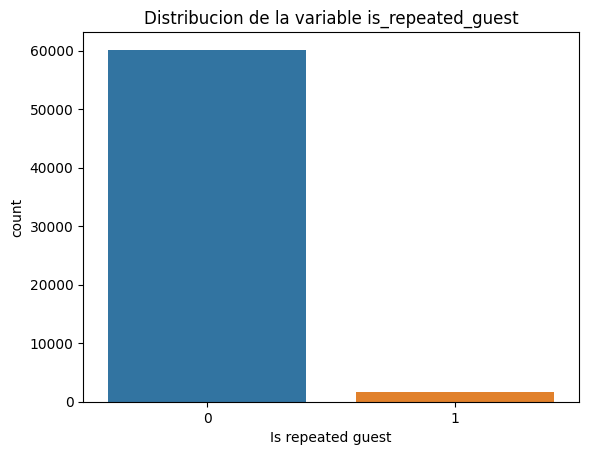

In [ ]:
sns.countplot(data = df_copia, x = "is_repeated_guest").set(title = "Distribucion de la variable is_repeated_guest", xlabel = "Is repeated guest")

Una conclusión evidente que podemos sacar del gráfico es que la mayoría de los huespedes registrados nunca habían concurrido anteriormente a los hoteles.

---



[Text(0.5, 1.0, "Mapa de calor de las variables 'reserved_room_type' y 'assigned_room_type'")]

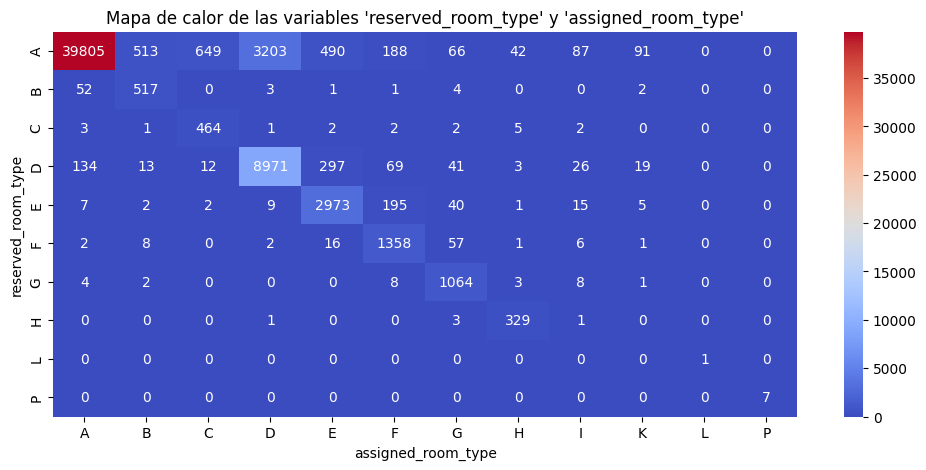

In [ ]:
plt.figure(figsize = (12,5))
crosstab_room = pd.crosstab(df_copia['reserved_room_type'], df_copia['assigned_room_type'])
sns.heatmap(crosstab_room, annot=True, fmt='g', cmap = "coolwarm").set(title = "Mapa de calor de las variables 'reserved_room_type' y 'assigned_room_type'")

Acá podemos notar que la mayoría de registros predominan en celdas donde los valores de "assigned_room_type" y "reserved_room_type" coinciden. Es decir, a la mayoría de clientes se les asignó la habitación que reservaron.

---



[Text(0.5, 1.0, 'Distribucion de la variable market_segment'),
 Text(0.5, 0, 'Market segment')]

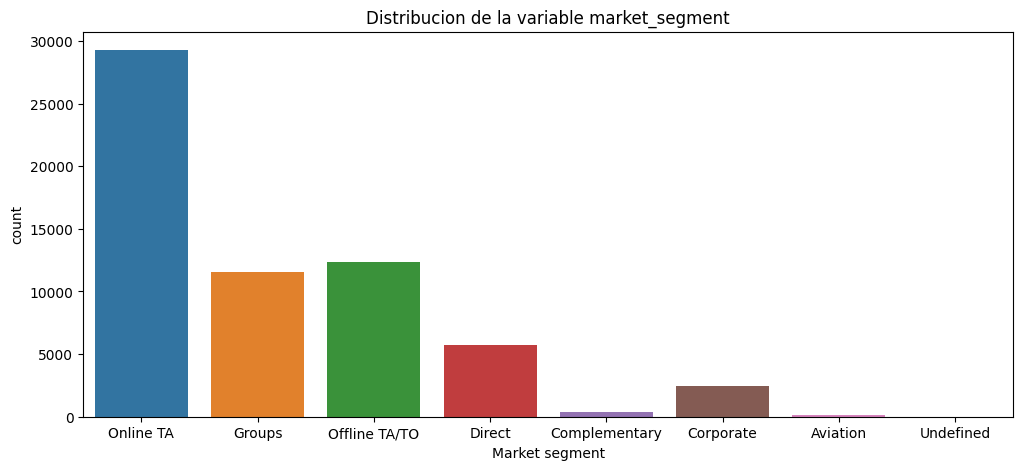

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(data = df_copia, x = "market_segment").set(title = "Distribucion de la variable market_segment", xlabel = "Market segment")



---



[Text(0.5, 1.0, 'Distribucion de la variable distribution_channel'),
 Text(0.5, 0, 'Distribution channel')]

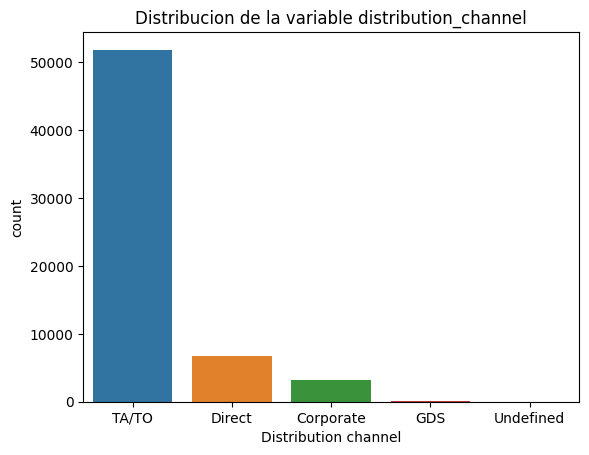

In [ ]:
sns.countplot(data = df_copia, x = "distribution_channel").set(title = "Distribucion de la variable distribution_channel", xlabel = "Distribution channel")



---



[Text(0.5, 1.0, 'Distribucion de la variable customer_type'),
 Text(0.5, 0, 'Customer type')]

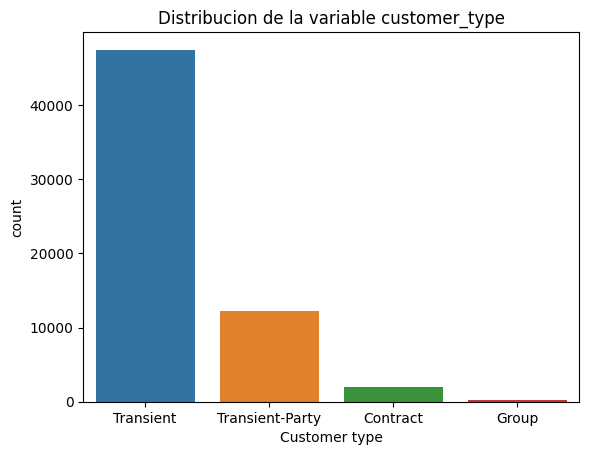

In [ ]:
sns.countplot(data = df_copia, x = "customer_type").set(title = "Distribucion de la variable customer_type", xlabel = "Customer type")



---



[Text(0.5, 1.0, 'Distribucion de la variable deposit_type'),
 Text(0.5, 0, 'Deposit type')]

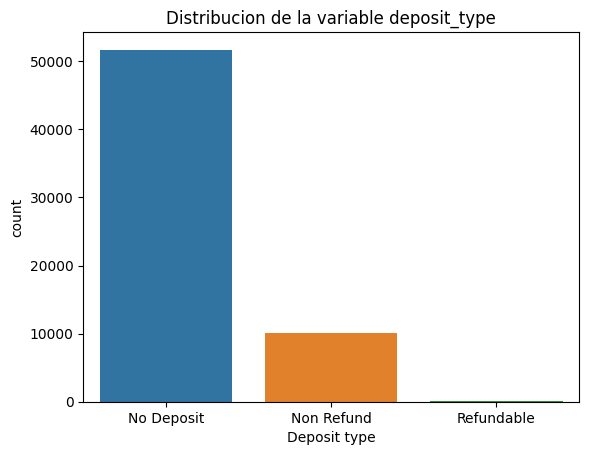

In [ ]:
sns.countplot(data = df_copia, x = "deposit_type").set(title = "Distribucion de la variable deposit_type", xlabel = "Deposit type")

En un primer vistazo, podemos notar que la opción mas frecuente es no ingresar un depósito ya que, claramente, es la opción más barata.

---



[Text(0.5, 1.0, 'Distribucion de la variable arrival_month'),
 Text(0.5, 0, 'Mes')]

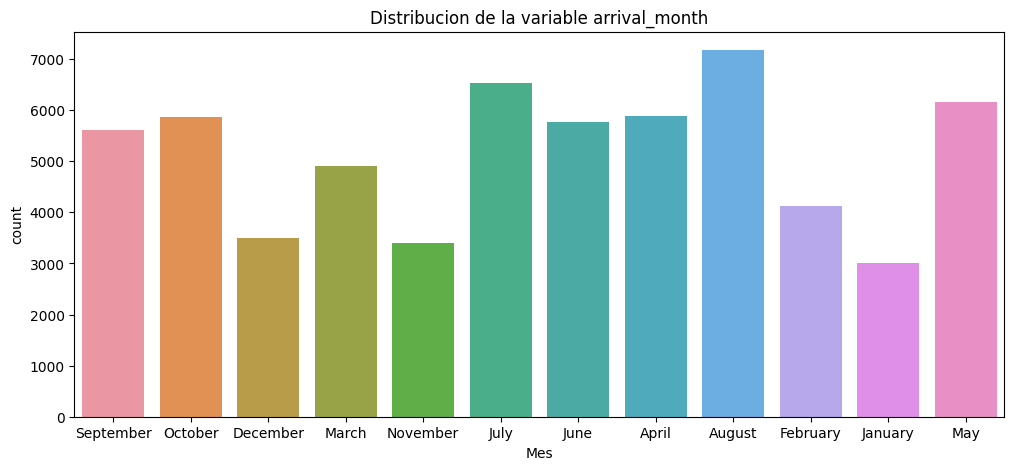

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(data = df_copia, x = "arrival_month").set(title = "Distribucion de la variable arrival_month", xlabel = "Mes")

Acá podemos analizar que los dos meses más concurridos, julio y agosto, son en época de verano.

---



## Correlacion y Covarianza

Observamos la correlacion y covarianza de las variables mediante estas dos tablas:

In [ ]:
variables_cuantitativas.cov()

,lead_time,arrival_year,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,babies,booking_changes,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,parking_spaces,special_requests
lead_time,12258.465118,1.818502,201.862627,-6.755375,6.538163,29.240236,7.235679,-2.054316,-0.233379,-1.334055,10.411942,-10.528775,343.075082,-499.994682,-2.784139,-10.539204
arrival_year,1.818502,0.501815,-5.179294,0.014490,0.019041,0.054483,0.011090,0.016954,-0.000897,0.011800,-0.100123,0.026815,-0.771887,7.355174,-0.001819,0.059268
arrival_week,201.862627,-5.179294,182.952957,6.868022,0.189758,0.311042,0.206254,0.034630,0.020212,0.099807,0.611967,-0.451341,4.867659,48.723868,0.004256,0.307129
arrival_day_month,-6.755375,0.014490,6.868022,77.360619,-0.135548,-0.438496,0.012687,0.049574,0.002082,0.051129,-0.301683,-0.024881,4.545072,14.153569,0.000573,0.052814
weekend_nights,6.538163,0.019041,0.189758,-0.135548,0.986249,0.914826,0.048787,0.020798,0.002013,0.026528,-0.010964,-0.052637,-1.063376,2.899560,-0.003123,0.055560
week_nights,29.240236,0.054483,0.311042,-0.438496,0.914826,3.552946,0.097702,0.044253,0.003716,0.080663,-0.025132,-0.118941,-0.145275,7.463522,-0.009022,0.107217
adults,7.235679,0.011090,0.206254,0.012687,0.048787,0.097702,0.346999,0.006933,0.000804,-0.016320,-0.001871,-0.079702,-0.103322,6.232389,0.001379,0.049148
children,-2.054316,0.016954,0.034630,0.049574,0.020798,0.044253,0.006933,0.162286,0.001075,0.014480,-0.010927,-0.011074,-0.266131,6.742575,0.004031,0.024995
babies,-0.233379,-0.000897,0.020212,0.002082,0.002013,0.003716,0.000804,0.001075,0.008493,0.004962,-0.000708,-0.000745,-0.018640,0.148478,0.000741,0.006671
booking_changes,-1.334055,0.011800,0.099807,0.051129,0.026528,0.080663,-0.016320,0.014480,0.004962,0.372734,-0.017939,0.010882,-0.167384,0.857223,0.010271,0.032618


<Axes: >

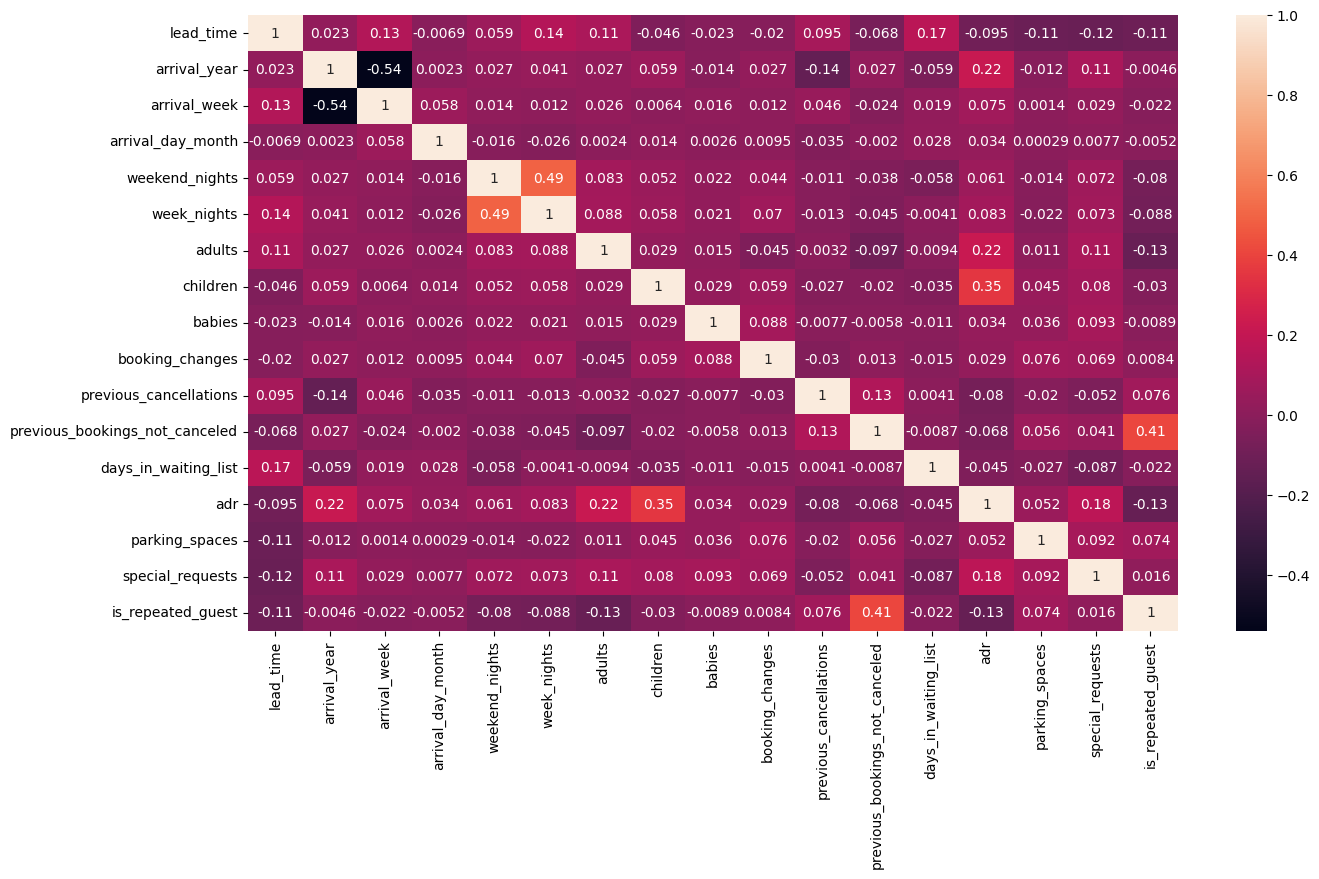

In [ ]:
variables_correlacion = df_copia[['lead_time','arrival_year','arrival_week','arrival_day_month','weekend_nights','week_nights','adults','children','babies','booking_changes', 'previous_cancellations','previous_bookings_not_canceled','days_in_waiting_list','adr','parking_spaces','special_requests', 'is_repeated_guest']]
plt.figure(figsize = (15,8))
sns.heatmap(variables_correlacion.corr(), annot = True)

Vemos que el Heatmap indica que muy pocas variables tienen una relación lineal entre sí. Acá abajo analizamos las excepciones:

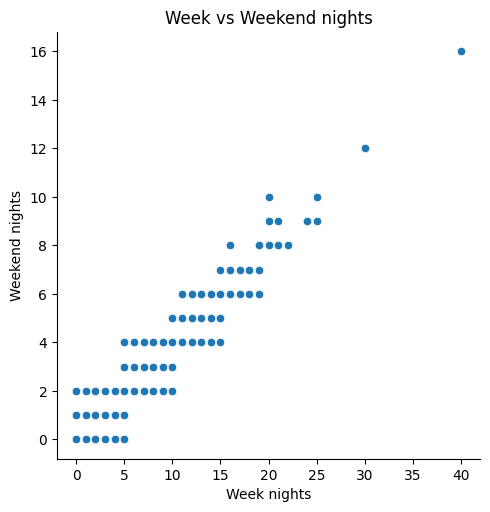

In [ ]:
sns.relplot(data = df_copia, x = "week_nights", y = "weekend_nights").set(xlabel = "Week nights", ylabel = "Weekend nights", title = "Week vs Weekend nights")

Tiene sentido que estas dos variables se relacionen de forma lineal ya que entre más días de semana se reserven, es lógico que tambien se reserven más días de fin de semana.

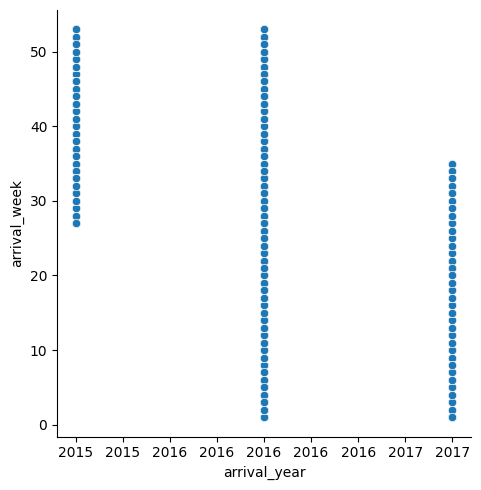

In [ ]:
sns.relplot(data = df_copia, x = "arrival_year", y = "arrival_week")
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)
plt.show()

Este gráfico parece que podría tener un comportamiento lineal. Sin embargo se ve de esta manera porque todos los registros fueron sacados entre mediados de 2015 hasta mediados de 2017, por eso no existen puntos en el que la semana sea menor a 30 en 2015 o puntos en los que la semana sea mayor a 40 en 2017.

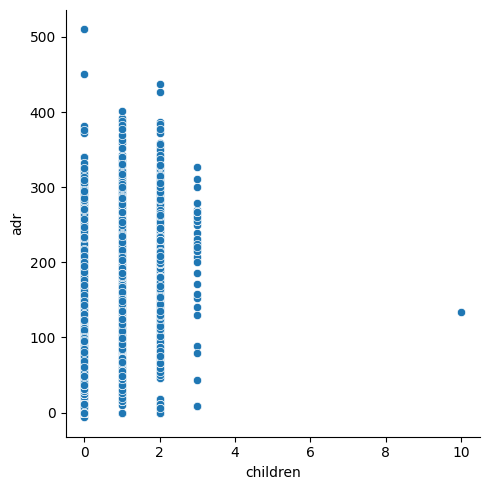

In [ ]:
sns.relplot(data = df_copia, x = "children", y = "adr")

El valor de correlacion entre estas dos variables es bastante bajo, aún así, es el tercero más alto de todos. Parece que los puntos forman una nube con cierta forma lineal. Por el momento no podríamos determinar si están realmente relacionadas por causalidad o no.

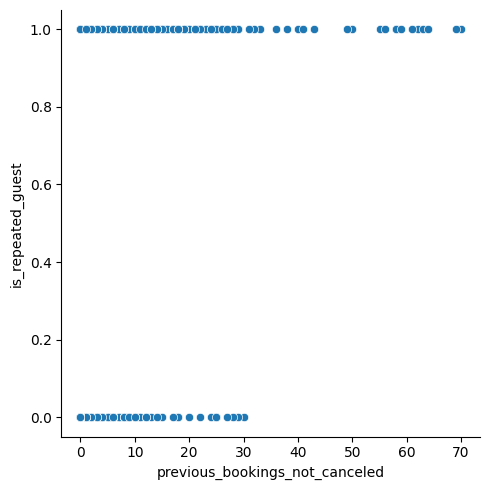

In [ ]:
sns.relplot(data = df_copia, x = "previous_bookings_not_canceled", y = "is_repeated_guest")

Podemos notar que mientras más reservas no canceladas se hicieron, es más probable que el cliente sea un huesped repetido. Lo cual tiene cierto sentido, ya que si un cliente tiene registradas muchas reservas es probable que se haya alojado en el hotel anteriormente.

## Variables vs Target

**En este apartado queremos analizar las variables en relacion con el target**







---


Primero observamos la frecuencia de las reservas que fueron canceladas y las que no:

[Text(0.5, 0, 'Is Canceled'),
 Text(0.5, 1.0, 'Frecuencia de la variable is_canceled')]

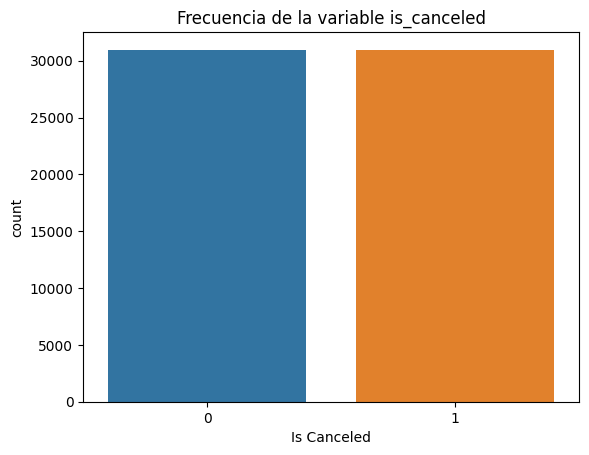

In [ ]:
sns.countplot(data = df_copia, x = "is_canceled").set(xlabel = "Is Canceled", title = "Frecuencia de la variable is_canceled")

La distribución del target es muy pareja. Los valores de los clientes que cancelaron y los que no cancelaron son muy similares.



---



Ahora analizamos las variables "assigned_room_type" y "reserved_room_type" con el target:

In [ ]:
pd.crosstab(df_copia['assigned_room_type'],df_copia['is_canceled'])

is_canceled,0,1
assigned_room_type,,
A,17002,23005
B,687,369
C,810,317
D,7741,4449
E,2379,1400
F,1184,637
G,715,562
H,203,181
I,140,5


In [ ]:
pd.crosstab(df_copia['reserved_room_type'],df_copia['is_canceled'])

is_canceled,0,1
reserved_room_type,,
A,21647,23487
B,314,266
C,261,221
D,5321,4264
E,1888,1361
F,844,607
G,540,550
H,157,177
L,0,1


In [ ]:
df_copia.groupby(['assigned_room_type','reserved_room_type', 'is_canceled']).count()['lead_time']

assigned_room_type  reserved_room_type  is_canceled
A                   A                   0              16812
                                        1              22993
                    B                   0                 50
                                        1                  2
                    C                   0                  3
                                                       ...  
K                   E                   0                  5
                    F                   0                  1
                    G                   0                  1
L                   L                   1                  1
P                   P                   1                  7
Name: lead_time, Length: 103, dtype: int64



---



Calculamos la frecuencia de la variable "arrival_date_month" teniendo en cuenta el target:

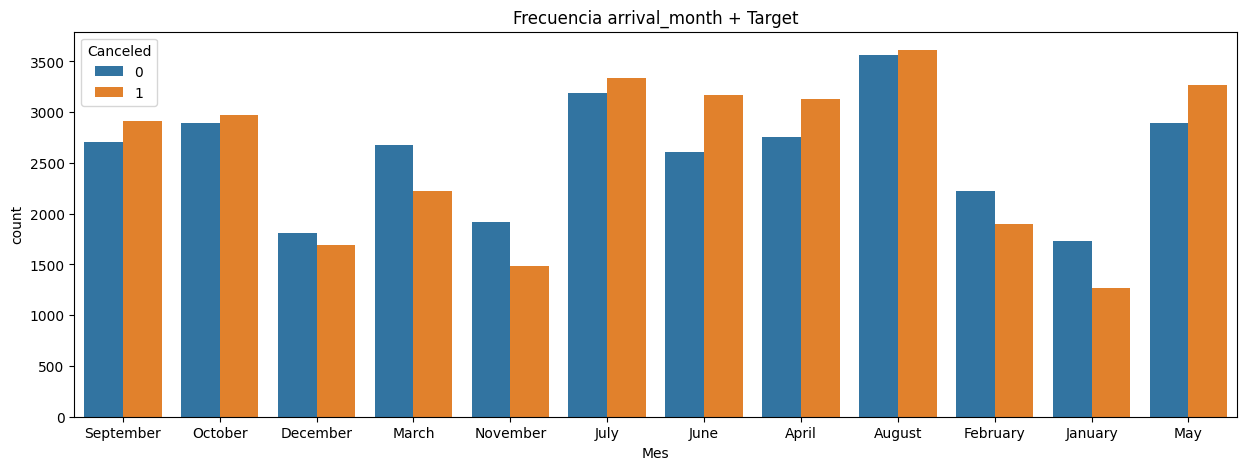

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_copia, x = "arrival_month", hue = "is_canceled").set(title = "Frecuencia arrival_month + Target", xlabel = "Mes")
plt.legend(title = "Canceled")
plt.show()

Se puede ver que en todos los meses la distribución del target es bastante equilibrada.

---



Calculamos la frecuencia de la variable "hotel" teniendo en cuenta el target:


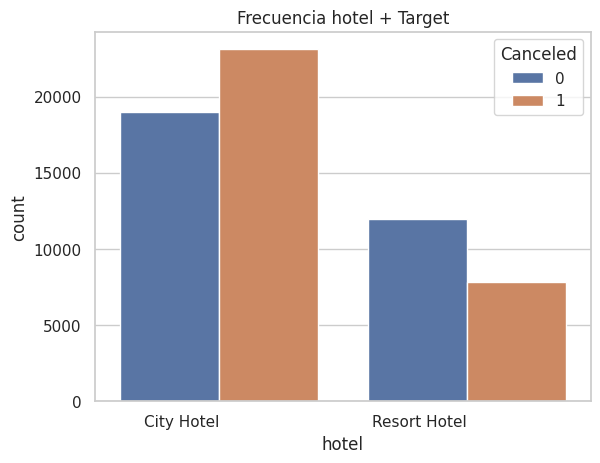

In [ ]:
sns.set(style = "whitegrid")
sns.countplot(data = df_copia, x = "hotel", hue = "is_canceled").set(title = "Frecuencia hotel + Target")
plt.xticks(ha = 'right')
plt.legend(title = "Canceled", loc = "upper right")
plt.show()

Los clientes que reservaron para City Hotel tienden a cancelar mas que los que reservaron para Resort Hotel.

---



Hacemos una tabla de contingencia entre las variables "is_repeated_guest" y el target:

In [ ]:
pd.crosstab(df_copia['is_repeated_guest'],df_copia['is_canceled'])

is_canceled,0,1
is_repeated_guest,,
0,29643,30537
1,1329,404


No hay mucho para comentar en esta tabla más allá de que la mayoria de registros no se hospedaron anteriormente.

---



Creamos una tabla de contingencia entre la variable "previous_cancellations" y el target:

In [ ]:
pd.crosstab(df_copia['previous_cancellations'],df_copia['is_canceled'])

is_canceled,0,1
previous_cancellations,,
0,30751,26768
1,130,4007
2,33,28
3,24,10
4,9,7
5,8,1
6,8,4
11,9,6
13,0,8



> La gran parte de los registros se concentran en el primer valor, 0 cancelaciones previas, que está bastante balanceada entre los que cancelaron y los que no.

> Con 1 cancelación previa cambia totalmente la distribución, la gran mayoría de los registros cancelaron.


> De 2 a 11 cancelaciones se invierte nuevamente, se registran más clientes que no cancelaron.

> A partir de 13 cancelaciones podemos ver que todos los clientes cancelaron.

---






Creamos una tabla de contingencia entre la variable "deposit_type" y el target:

In [ ]:
pd.crosstab(df_copia['deposit_type'],df_copia['is_canceled'])

is_canceled,0,1
deposit_type,,
No Deposit,30885,20800
Non Refund,37,10113
Refundable,50,28


> Los datos se concentran en 'No Deposit', donde hay más registros que no cancelaron su reserva.


> Algo para recalcar en esta tabla es la opcion 'Non Refund', ya que casi en su totalidad, los clientes que eligieron esta opción terminaron cancelando.

---





Hacemos un gráfico de dispersión entre la variable "lead_time" y el target:

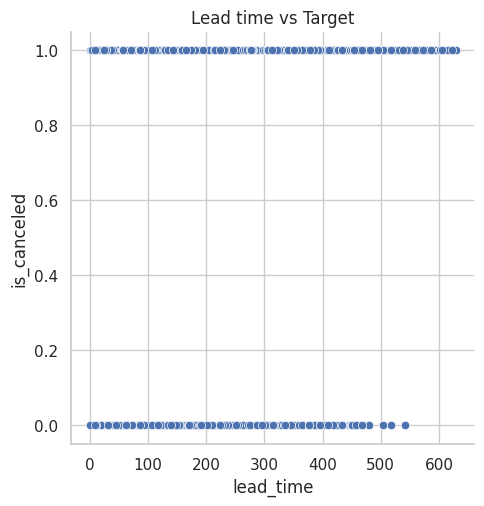

In [ ]:
sns.relplot(data = df_copia, x = "lead_time", y = "is_canceled").set(title = "Lead time vs Target")

Hasta los 450 días no se llega a ver algo interesante para analizar. Aproximadamente a partir de ese día, la mayoria de los clientes tienden a cancelar.

---



Creamos un gráfico de dispersión entre la variable "days_in_waiting_list" y el target:

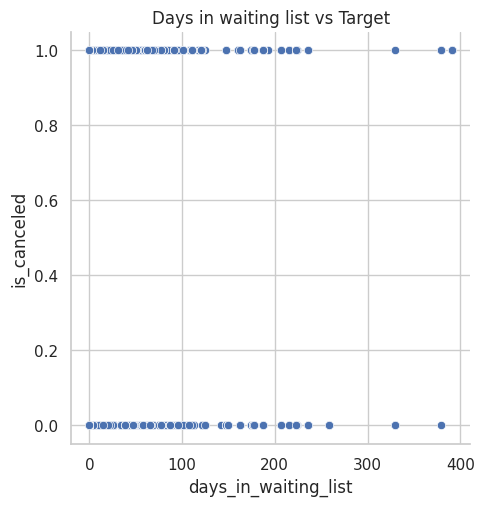

In [ ]:
sns.relplot(data = df_copia, x = "days_in_waiting_list", y = "is_canceled").set(title = "Days in waiting list vs Target")



---



Hacemos un gráfico de dispersión entre la variable "booking_changes" y el target:

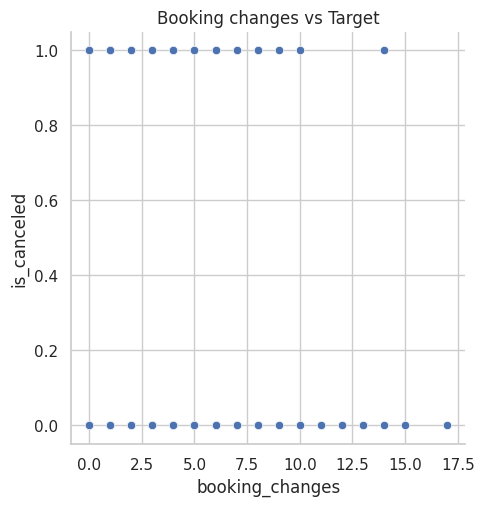

In [ ]:
sns.relplot(data = df_copia, x = "booking_changes", y = "is_canceled").set(title = "Booking changes vs Target")

La distribución de las variables parece bastante uniforme hasta llegar a los 10 cambios de reserva. A partir de ahí los clientes tienden a no cancelar.

---



Creamos un gráfico de dispersión entre la variable "previous_bookings_not_canceled" y el target:

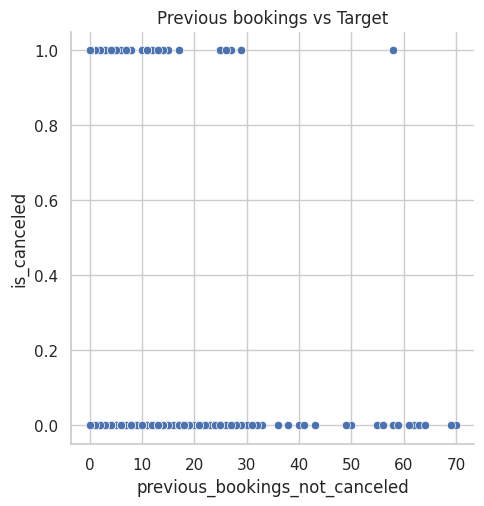

In [ ]:
sns.relplot(data = df_copia, x = "previous_bookings_not_canceled", y = "is_canceled").set(title = "Previous bookings vs Target")

A partir de las 30 reservas hechas, la gran mayoría de los registros terminaron no cancelando su reserva.

---



Creamos un gráfico de dispersión entre la variable "adults" y el target:

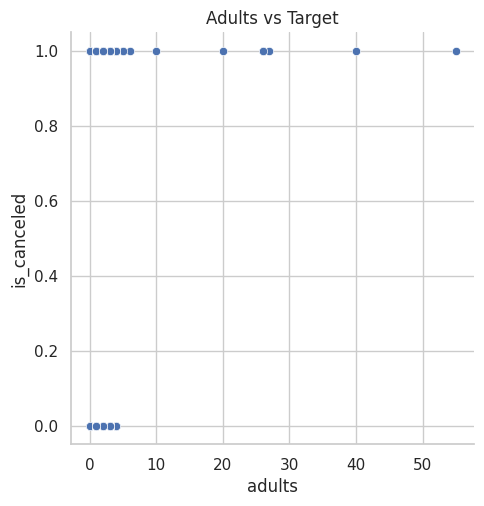

In [ ]:
sns.relplot(data = df_copia, x = "adults", y = "is_canceled").set(title = "Adults vs Target")

Gran parte de los registros se concentran en valores menores de 5. Luego, con valores mayores, todos los clientes cancelaron su reserva.

---



Construimos un gráfico de dispersión entre la variable "adr" y el target:

<Figure size 1500x500 with 0 Axes>

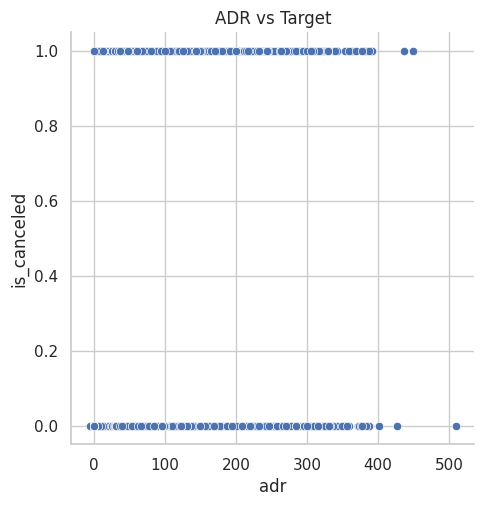

In [ ]:
plt.figure(figsize = (15,5))
sns.relplot(data = df_copia, x = "adr", y = "is_canceled").set(title = "ADR vs Target")

La distribución del target se encuentra bastante balanceada durante todo el rango de valores que toma la variable 'adr'.

---



Creamos un gráfico de dispersión entre la variable "required_car_parking_spaces" y el target:

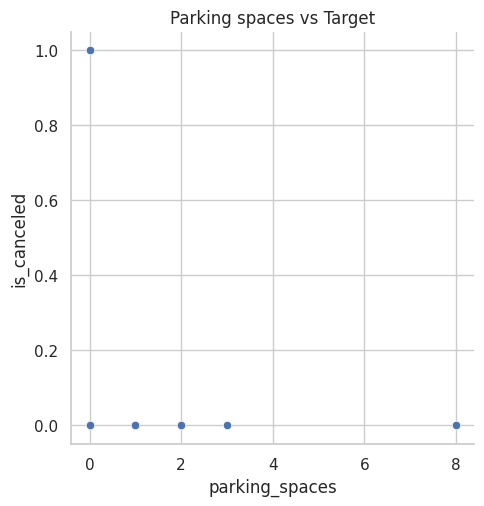

In [ ]:
sns.relplot(data = df_copia, x = "parking_spaces", y = "is_canceled").set(title = "Parking spaces vs Target")

Todos los clientes que reservaron uno o más lugares de estacionamiento no cancelaron su reserva.


---



Hacemos un gráfico de dispersión entre la variable "stays_in_week_nights" y el target:

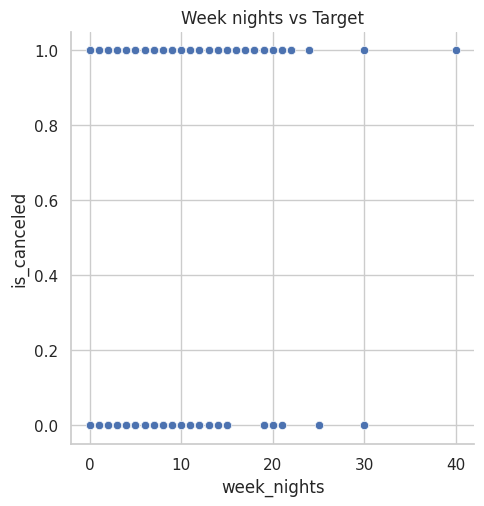

In [ ]:
sns.relplot(data = df_copia, x = "week_nights", y = "is_canceled").set(title = "Week nights vs Target")

Se pueden observar algunos intervalos en los que todos los registros cancelaron. Se observa uno entre los 10 y 20 dias de semana, y otros entre los 20 y 30.

---



Construimos un gráfico de dispersión entre la variable "stays_in_weekend_nights" y el target:

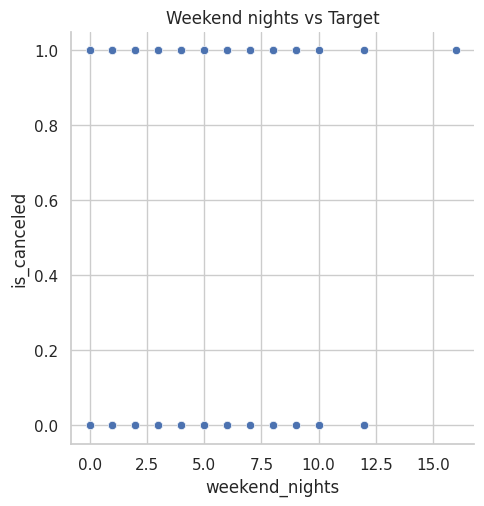

In [ ]:
sns.relplot(data = df_copia, x = "weekend_nights", y = "is_canceled").set(title = "Weekend nights vs Target")

La única observación relevante que se puede realizar sobre este gráfico es el valor atípico que se encuentra pasando los 15 dias de fin de semana.

---



# Análisis de valores faltantes

Observamos la cantidad de datos faltantes en total y para cada variable

In [ ]:
print(f"En total hay {df_copia.isnull().sum().sum()} datos faltantes en el dataset")

En total hay 66876 datos faltantes en el dataset


In [ ]:
print(df_copia.isnull().sum())

hotel                                 0
lead_time                             0
arrival_year                          0
arrival_month                         0
arrival_week                          0
arrival_day_month                     0
weekend_nights                        0
week_nights                           0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Vemos si hay datos inválidos, como pueden ser los caracetes especiales

In [ ]:
# Se define la expresión regular para valores que no sean numeros ni letras
regex_pattern = r'[^a-zA-Z0-9]'

# Se aplica a todas las columnas una funciion que devuelve todas las que contienen valores invalidos
variables_con_invalidos = df_copia.apply(lambda x: x.astype(str).str.contains(regex_pattern).any(), axis=0)

print(variables_con_invalidos)

hotel                              True
lead_time                         False
arrival_year                      False
arrival_month                     False
arrival_week                      False
arrival_day_month                 False
weekend_nights                    False
week_nights                       False
adults                            False
children                           True
babies                            False
meal                              False
country                           False
market_segment                     True
distribution_channel               True
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                       True
agent                              True
company                            True
days_in_waiting_list              False


Idem para las variables numéricas

In [ ]:
columnas_numericas = list(df_copia.select_dtypes(include=[np.number]).columns.values)

print(columnas_numericas)

['lead_time', 'arrival_year', 'arrival_week', 'arrival_day_month', 'weekend_nights', 'week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'parking_spaces', 'special_requests', 'is_canceled']


In [ ]:
(df_copia[columnas_numericas] < 0).any().to_frame('Contiene menores que 0')

,Contiene menores que 0
lead_time,False
arrival_year,False
arrival_week,False
arrival_day_month,False
weekend_nights,False
week_nights,False
adults,False
children,False
babies,False
is_repeated_guest,False


In [ ]:
print(f'{(df_copia["adr"] < 0).sum()} reserva/s tienen rendimientos negativos')

1 reserva/s tienen rendimientos negativos


### Análisis de valores faltantes por columna

Conociendo la cantidad de valores faltantes que tienen las variables, averiguamos qué porcentaje de ellas es el involucrado

In [ ]:
# Lista con las columnas que tienen datos faltantes
columnas_con_faltantes = [columna for columna in df_copia.columns if df_copia[columna].isnull().any()]

print(columnas_con_faltantes)

['children', 'country', 'agent', 'company']


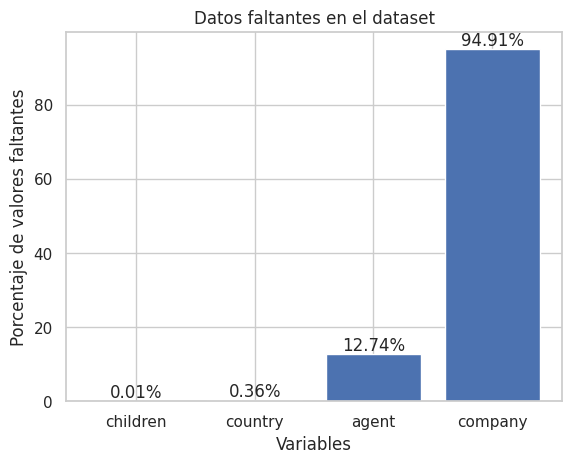

In [ ]:
porcentaje_faltantes_por_columna = []

for columna in columnas_con_faltantes:
  faltantes = df_copia[columna].isnull().sum() / len(df_copia[columna]) * 100
  porcentaje_faltantes_por_columna.append(faltantes)

plt.bar(columnas_con_faltantes, porcentaje_faltantes_por_columna)

# Etiquetas y título
plt.xlabel('Variables')
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Datos faltantes en el dataset')

# Porcentajes sobre cada barra
for i, v in enumerate(porcentaje_faltantes_por_columna):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

# Mostrar grafico
plt.show()

### Manipulación de datos faltantes

##### Variable Children

Como son pocos registros con datos de children faltantes, los eliminamos

In [ ]:
df_copia.dropna(subset=['children'], inplace=True)
df_filtrado = df_copia.dropna(subset=['children'], inplace=False)

df_filtrado['children'].isnull().sum()

0

##### Variable Country

En éste caso se completan los datos faltantes

In [ ]:
df_filtrado['country'] = df_filtrado['country'].fillna('sin_pais')

df_filtrado['country'].isnull().sum()

0

##### Variable Agent

Aqui utilizaremos un modelo de regresion logistica multivariada para imputar los datos faltantes

In [ ]:
# seleccionar las variables relevantes para el modelo y eliminar filas con valores faltantes
variables_utiles = ['hotel', 'country', 'market_segment', 'distribution_channel', 'customer_type', 'agent']
_df = df_filtrado[variables_utiles].dropna()
x_faltantes = df_filtrado[variables_utiles][df_filtrado['agent'].isnull()]

# codificar las variables cualitativas usando one-hot encoding
onehotencoder = OneHotEncoder(handle_unknown='ignore')
x_encoded = onehotencoder.fit_transform(_df.drop('agent', axis=1)).toarray()
y = _df['agent']
x = pd.DataFrame(x_encoded, columns=onehotencoder.get_feature_names_out(['hotel', 'country', 'market_segment', 'distribution_channel', 'customer_type']))

# imputar los valores faltantes en la variable objetivo 'agent' usando SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.to_numpy().reshape(-1,1)).ravel()

# entrenar el modelo de regresión logística
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=30)
model.fit(x, y)

# predecir los valores faltantes en la variable objetivo 'agent'
predicciones = model.predict(onehotencoder.transform(x_faltantes.drop('agent', axis=1)))
df_filtrado.loc[df_filtrado['agent'].isnull(), 'agent'] = predicciones

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
df_filtrado['agent'].isnull().sum()

0

##### Variable Company

Se decide eliminar la variable del dataset ya que casi el 95% de sus datos son nulos y por lo tanto no aporta informacion util

In [ ]:
df_filtrado.drop('company', axis='columns', inplace=True)

# Análisis de valores atípicos

Del análisis hecho en los gráficos de distribución de variables podemos mencionar aquellas donde se encontraron, muy probablemente, outliers o valores atípicos:



---




adr, lead_time, week_nights, weekend_nights, adults, children, babies, previous_cancellations, previous_bookings_not_canceled, booking_changes, parking_spaces.





---



## Análisis univariado

Volveremos a mostrar los gráficos de distribución para trabajar de forma más cómoda.

### Caso ADR

[Text(0.5, 1.0, 'Boxplot variable adr'), Text(0, 0.5, 'ADR')]

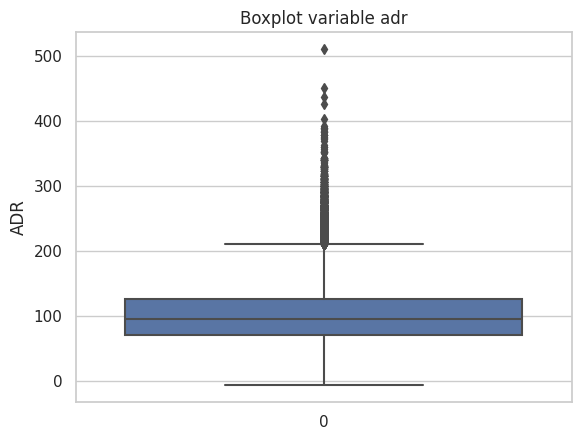

In [ ]:
sns.boxplot(df_copia['adr']).set(title = 'Boxplot variable adr',ylabel = 'ADR')


In [ ]:
df_copia['adr'].describe()

count    61909.000000
mean       102.388474
std         47.755102
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

In [ ]:
Q1 = np.quantile(df_copia['adr'],0.25)
Q3 = np.quantile(df_copia['adr'],0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

print(min)
print(max)


-14.0
210.0


In [ ]:
df_copia[df_copia['adr'] <= 0]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
21,Resort Hotel,9,2016,December,51,14,0,2,2,0.0,...,NaN,NaN,0,Transient,0.0,0,0,2016-12-16,b26bb222-3f15-4f54-84fd-fc1762dd47ce,0
61,City Hotel,47,2015,December,49,5,2,1,1,0.0,...,1.0,NaN,0,Transient-Party,0.0,0,0,2015-12-08,03977185-cd72-4906-8a1f-43c3b4858cae,0
102,Resort Hotel,28,2015,October,43,21,0,2,2,0.0,...,208.0,NaN,0,Transient-Party,0.0,0,0,2015-10-02,24d77fe6-3663-44f8-adbd-7e8c5597db88,1
130,Resort Hotel,38,2017,June,23,9,1,2,2,0.0,...,240.0,NaN,0,Transient,0.0,0,1,2017-06-12,58e72f07-fdda-4ba1-bc26-eb537b1c234f,0
219,City Hotel,6,2017,January,2,10,0,1,3,0.0,...,NaN,NaN,0,Transient,0.0,0,1,2017-01-11,0f2d9788-48f8-4635-b9d2-b703937e3029,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61760,Resort Hotel,109,2017,April,17,25,0,2,1,0.0,...,502.0,NaN,0,Transient-Party,0.0,0,0,2017-04-27,5073814f-fe47-486c-af23-a2d43d8297a0,0
61765,City Hotel,21,2015,November,46,13,0,2,2,0.0,...,NaN,NaN,0,Transient,0.0,0,1,2015-11-04,4ba63171-537b-4f4c-831b-077f9c171f26,1
61771,Resort Hotel,34,2016,October,44,27,0,0,2,0.0,...,6.0,NaN,0,Transient,0.0,0,0,2016-10-27,5551d3a4-5ce8-42cd-a099-3342b6c683a9,0
61835,Resort Hotel,71,2015,August,31,1,2,6,2,0.0,...,196.0,NaN,0,Transient,0.0,0,0,2015-08-09,efe382f9-6357-4859-8487-565dec144e39,0


Todos estos registros tienen como valor de adr menor o igual a 0. Cosa que para la variable no tiene sentido, por lo tanto debemos hacer algo al respecto con estas filas.

Podemos probar reemplazar por la mediana y comprobar si no se altera demasiado la distribucion.

In [ ]:
df_temporal = df_copia.copy()
df_temporal['adr'] = df_copia['adr'].where(df['adr'] > 0, df_copia['adr'].median())

In [ ]:
df_temporal['adr'].describe()

count    61909.000000
mean       103.746619
std         46.147582
min          0.500000
25%         72.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

Vemos que altera muy poco la distribución, por lo tanto realizamos lo mismo en el dataframe base.

In [ ]:
df_copia['adr'] = df_copia['adr'].where(df['adr'] > 0, df_copia['adr'].median())

In [ ]:
df_copia['adr'].describe()

count    61909.000000
mean       103.746619
std         46.147582
min          0.500000
25%         72.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

Ahora vamos con los valores atípicos mayores.

In [ ]:
df_copia[df_copia['adr'] > 300]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
238,Resort Hotel,38,2017,August,32,7,1,5,2,1.0,...,250.0,NaN,0,Transient,302.5,0,1,2017-08-13,988bf050-6aa8-4211-ac09-752c4e58bcbd,0
439,City Hotel,21,2017,July,27,6,0,1,2,2.0,...,9.0,NaN,0,Transient,307.0,0,0,2017-06-15,f4330103-9555-4f10-b40b-52fc138e341c,1
684,Resort Hotel,47,2017,August,32,12,2,3,3,1.0,...,240.0,NaN,0,Transient,340.0,0,0,2017-08-07,32635698-ea93-4169-9bd6-2addd2567b8f,1
774,Resort Hotel,31,2016,December,53,30,0,2,2,0.0,...,NaN,NaN,0,Transient-Party,305.0,0,1,2017-01-01,5d3926a2-bede-4452-af7b-bd5100091a97,0
1251,Resort Hotel,16,2016,August,32,5,0,2,3,1.0,...,240.0,NaN,0,Transient-Party,352.0,0,0,2016-08-07,ca2c9b3f-d5d3-4351-8a7e-4480b616766a,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60071,Resort Hotel,104,2017,August,33,17,2,3,3,1.0,...,240.0,NaN,0,Transient,402.0,0,1,2017-08-22,7948179b-85f7-4764-ae7e-3647bf1693f8,0
60771,Resort Hotel,10,2016,August,34,20,1,1,2,1.0,...,250.0,NaN,0,Transient,300.6,1,0,2016-08-22,7477661e-1056-4da4-8196-641f2d49dc18,0
61452,Resort Hotel,8,2017,August,31,5,0,1,2,2.0,...,240.0,NaN,0,Transient,330.0,0,0,2017-08-01,ee9c48d4-bfbf-4eb4-91b0-4474886437e8,1
61745,Resort Hotel,205,2017,August,31,2,1,4,2,2.0,...,240.0,NaN,0,Transient,300.4,0,2,2017-01-17,f4bd2623-14df-4912-8abf-b698381ac634,1


Podemos ver que hay 144 registros que tienen un ADR mayor a 300, el cual es un valor atípico, se aleja bastante de la media.

In [ ]:
print(f"El porcentaje de la muestra con respecto al dataframe es de {len(df_copia.loc[df_copia['adr'] > 300])*100 / len(df_copia['adr'])}%.")

El porcentaje de la muestra con respecto al dataframe es de 0.23259946049847358%.


Es un porcentaje muy despreciable, así que nos tomamos la libertad de eliminar estos registros.

In [ ]:
df_copia = df_copia.drop(df_copia[df_copia['adr'] > 300].index)

In [ ]:
df_copia['adr'].describe()

count    61765.000000
mean       103.217986
std         44.855026
min          0.500000
25%         72.000000
50%         95.000000
75%        126.000000
max        300.000000
Name: adr, dtype: float64

Finalmente vemos como quedó el boxplot de la variable luego de los cambios hechos.

[Text(0.5, 1.0, 'Boxplot variable adr'), Text(0, 0.5, 'ADR')]

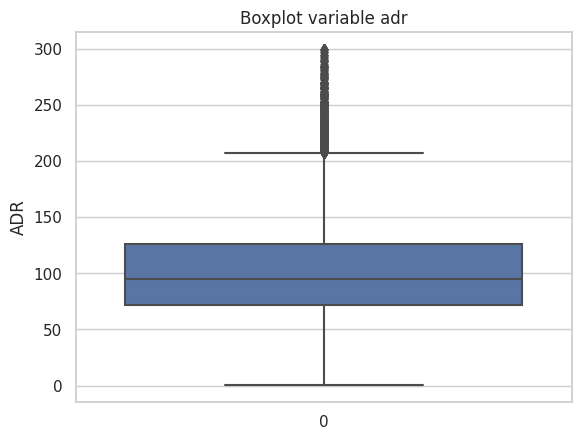

In [ ]:
sns.boxplot(df_copia['adr']).set(title = 'Boxplot variable adr',ylabel = 'ADR')

### Caso Lead Time

[Text(0.5, 1.0, 'Boxplot variable lead_time'), Text(0, 0.5, 'Lead time')]

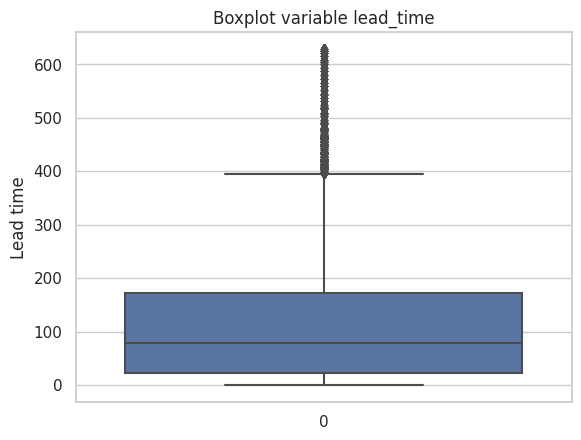

In [ ]:
sns.boxplot(df_copia['lead_time']).set(title = 'Boxplot variable lead_time', ylabel = 'Lead time')

In [ ]:
df_copia['lead_time'].describe()

count    61765.000000
mean       112.331903
std        110.764518
min          0.000000
25%         23.000000
50%         78.000000
75%        172.000000
max        629.000000
Name: lead_time, dtype: float64

In [ ]:
Q1 = np.quantile(df_copia['lead_time'],0.25)
Q3 = np.quantile(df_copia['lead_time'],0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

print(min)
print(max)

-200.5
395.5


In [ ]:
df_copia[df_copia['lead_time'] < 0]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled


In [ ]:
df_copia[df_copia['lead_time'] == 0]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
63,Resort Hotel,0,2017,April,14,3,1,0,1,0.0,...,NaN,512.0,0,Transient,45.00,0,0,2017-04-04,e2680436-2a94-4532-88f1-21f11a7af3e5,0
100,Resort Hotel,0,2016,January,2,4,2,5,2,0.0,...,NaN,NaN,0,Transient,48.00,0,0,2016-01-11,134b7af1-106d-4bb8-9901-2f15bffb021c,0
125,City Hotel,0,2016,December,51,11,1,0,1,0.0,...,NaN,NaN,0,Transient,88.00,0,0,2016-12-12,58ff7f12-7bc5-45c9-8b59-ca6668d5e8fe,0
156,City Hotel,0,2016,April,17,18,1,0,2,0.0,...,NaN,NaN,0,Transient,118.00,0,0,2016-04-19,ca0fbd16-21bf-4975-ae63-843594e7bd05,0
205,Resort Hotel,0,2015,November,47,17,0,1,1,0.0,...,NaN,88.0,0,Transient,35.00,1,0,2015-11-18,b0786016-5642-4186-959b-d5fec08ca21b,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61826,City Hotel,0,2015,November,46,9,1,2,1,0.0,...,9.0,NaN,0,Contract,100.00,1,1,2015-11-12,69c53868-3508-413f-96d1-8dea95f30009,0
61863,City Hotel,0,2016,June,23,3,0,1,2,0.0,...,NaN,263.0,0,Transient,120.00,0,0,2016-06-04,a3da9125-783f-44a7-ad41-a2bcb3a151c1,0
61867,City Hotel,0,2016,October,42,9,1,0,3,0.0,...,NaN,NaN,0,Transient,77.00,0,0,2016-10-10,88f608df-ad0f-4f38-bd1d-5a4f062f8927,0
61892,Resort Hotel,0,2016,April,18,29,2,5,1,0.0,...,NaN,NaN,0,Transient,99.29,0,0,2016-05-06,a0f57857-dae3-4df1-9553-604380f93ff4,0


In [ ]:
print(f"El porcentaje de la muestra con respecto al dataframe es de {len(df_copia.loc[df_copia['lead_time'] == 0])*100 / len(df_copia['lead_time'])}%.")

El porcentaje de la muestra con respecto al dataframe es de 4.470169189670526%.


Se encontraron 2764 registros en los que la variable "lead_time" vale 0, un valor que no es lógico que pueda aparecer. Pero al ser una cantidad de filas no despreciable, no podemos borrarlas simplemente, así que buscamos otros métodos.

Observamos como cambiaría la distribución de la variable si reemplazáramos todos los 0 por su media.

In [ ]:
df_temporal = df_copia['lead_time'].replace(0, df_copia['lead_time'].mean())
df_temporal.describe()

count    61765.000000
mean       117.353329
std        108.071679
min          1.000000
25%         31.000000
50%         92.000000
75%        172.000000
max        629.000000
Name: lead_time, dtype: float64

Al hacer esto el valor de la mediana cambia considerablemente. Por lo tanto no es la mejor opción a realizar. Más adelante buscaremos relación entre estos valores y otras variables para llegar a una mejor solución.

### Casos Week y Weekend nights

#### Week nights

[Text(0.5, 1.0, 'Boxplot variable week_nights'), Text(0, 0.5, 'Week nights')]

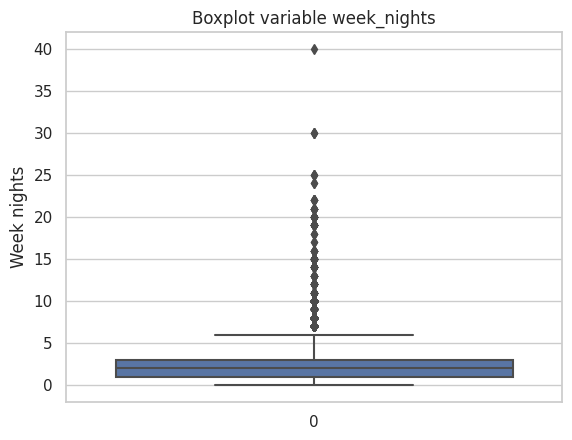

In [ ]:
sns.boxplot(df_copia['week_nights']).set(title = 'Boxplot variable week_nights', ylabel = 'Week nights')

In [ ]:
df_copia['week_nights'].describe()

count    61765.000000
mean         2.508492
std          1.885066
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: week_nights, dtype: float64

In [ ]:
Q1 = np.quantile(df_copia['week_nights'],0.25)
Q3 = np.quantile(df_copia['week_nights'],0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

print(min)
print(max)

-2.0
6.0


In [ ]:
df_copia[df_copia['week_nights'] >= 20]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
3855,City Hotel,123,2017,January,3,15,10,20,3,0.0,...,9.0,NaN,0,Transient,140.00,0,0,2016-09-16,37701593-dc47-40a3-ba09-fdcf7d769807,1
5295,Resort Hotel,182,2017,March,9,1,8,22,2,2.0,...,240.0,NaN,0,Transient,130.00,0,1,2016-11-24,9cd638c4-6217-4870-b5ef-d0e82f322bfb,1
6423,City Hotel,9,2017,January,4,27,8,21,3,0.0,...,9.0,NaN,0,Transient,133.36,0,1,2017-01-21,73e4b997-45b7-4a5c-9a90-0b6824bc1e7d,1
9229,Resort Hotel,13,2016,April,18,25,9,24,2,0.0,...,NaN,110.0,0,Transient,77.00,0,0,2016-04-19,78c96b33-4f25-4f97-81d5-f63b0d64a201,1
10018,City Hotel,42,2016,August,35,27,8,20,0,0.0,...,7.0,NaN,0,Transient,95.00,0,1,2016-09-24,7dc77c3a-face-4ebb-913a-cc914336b011,0
12477,Resort Hotel,73,2017,January,4,27,8,21,1,0.0,...,240.0,NaN,0,Transient,37.83,0,1,2016-11-18,c2cbf793-facc-40c6-b43c-0103e0a4fe13,1
14236,City Hotel,25,2015,November,49,30,9,24,2,0.0,...,NaN,NaN,0,Transient,98.33,0,0,2015-11-30,ed391057-b6cd-4c4b-a380-ec3180dbd9ec,1
14877,City Hotel,66,2016,November,48,20,8,20,2,2.0,...,9.0,NaN,0,Transient,147.90,0,1,2016-09-22,10ecc525-1927-4b4d-a9b8-b409707a855c,1
15728,Resort Hotel,131,2017,January,2,8,8,20,2,0.0,...,314.0,NaN,0,Transient,54.35,0,0,2017-02-05,7bc6b905-9baa-4c0c-818f-1e146c4f408d,0
18282,Resort Hotel,284,2016,January,3,12,8,20,2,0.0,...,171.0,NaN,0,Transient,26.10,0,0,2015-09-12,d8b0dc47-1d91-42d7-b3b4-e106123a972f,1


In [ ]:
print(f"El porcentaje de la muestra con respecto al dataframe es de {len(df_copia.loc[df_copia['week_nights'] >= 20])*100 / len(df_copia['week_nights'])}%.")

El porcentaje de la muestra con respecto al dataframe es de 0.07447583582935319%.


In [ ]:
df_copia[df_copia['week_nights'] < 10]['week_nights'].describe()

count    61039.000000
mean         2.398057
std          1.551118
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: week_nights, dtype: float64

Los valores atípicos de esta variable alteran de manera muy despreciable la distribución de la variable. Por lo tanto tomamos la decisión de dejarlos, ya que podrían ayudar a aportar información en otros análisis.

#### Weekend nights

[Text(0.5, 1.0, 'Boxplot variable weekend_nights'),
 Text(0, 0.5, 'Weekend nigths')]

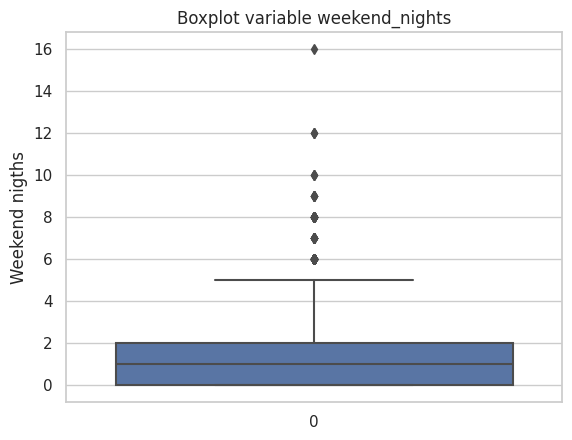

In [ ]:
sns.boxplot(df_copia['weekend_nights']).set(title = 'Boxplot variable weekend_nights', ylabel = 'Weekend nigths')

In [ ]:
df_copia['weekend_nights'].describe()

count    61765.000000
mean         0.923549
std          0.993152
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: weekend_nights, dtype: float64

In [ ]:
Q1 = np.quantile(df_copia['weekend_nights'],0.25)
Q3 = np.quantile(df_copia['weekend_nights'],0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

print(min)
print(max)

-3.0
5.0


In [ ]:
df_copia[df_copia['weekend_nights'] > 6]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
3855,City Hotel,123,2017,January,3,15,10,20,3,0.0,...,9.0,NaN,0,Transient,140.00,0,0,2016-09-16,37701593-dc47-40a3-ba09-fdcf7d769807,1
5295,Resort Hotel,182,2017,March,9,1,8,22,2,2.0,...,240.0,NaN,0,Transient,130.00,0,1,2016-11-24,9cd638c4-6217-4870-b5ef-d0e82f322bfb,1
6423,City Hotel,9,2017,January,4,27,8,21,3,0.0,...,9.0,NaN,0,Transient,133.36,0,1,2017-01-21,73e4b997-45b7-4a5c-9a90-0b6824bc1e7d,1
9229,Resort Hotel,13,2016,April,18,25,9,24,2,0.0,...,NaN,110.0,0,Transient,77.00,0,0,2016-04-19,78c96b33-4f25-4f97-81d5-f63b0d64a201,1
9608,Resort Hotel,292,2017,June,24,14,8,19,1,0.0,...,40.0,NaN,0,Contract,49.95,0,0,2017-06-14,820bcfde-b519-473c-968e-dba01269e3e3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59100,Resort Hotel,210,2016,December,51,13,8,20,2,0.0,...,314.0,NaN,0,Transient,47.57,0,0,2016-07-19,12691a95-ab1a-4de4-b2b4-797f10c61d05,1
59231,City Hotel,13,2017,January,4,24,8,22,1,0.0,...,9.0,NaN,0,Transient,73.89,0,1,2017-01-16,590da6f9-1f45-4237-85ed-1006da76d6b8,1
60483,Resort Hotel,192,2017,January,2,14,10,25,2,0.0,...,6.0,NaN,0,Transient,34.00,0,0,2017-02-18,817e4b07-d56f-41d5-ac78-dc9f1ead3e35,0
60607,Resort Hotel,172,2016,January,3,12,8,20,2,0.0,...,314.0,NaN,0,Contract,25.92,0,1,2016-02-09,658bcc42-6c75-495c-9dca-08ba526a7388,0


In [ ]:
df_copia[df_copia['weekend_nights'] <= 6]['weekend_nights'].describe()

count    61703.000000
mean         0.916130
std          0.964517
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: weekend_nights, dtype: float64

De la misma manera que con Week nights, eliminar los valores atípicos afecta de mínimamente a la distribución de la variable, por lo tanto no vale la pena eliminarlos.

### Casos Edades

#### Adults

[Text(0.5, 1.0, 'Distribucion de la variable adults'), Text(0.5, 0, 'Adults')]

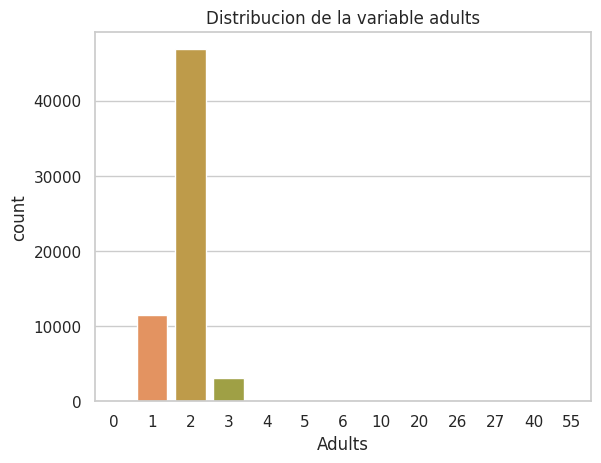

In [ ]:
sns.countplot(data = df_copia, x = "adults").set(title = "Distribucion de la variable adults", xlabel = "Adults")

Este es el gráfico visto en un countplot, también se puede visualizar en un boxplot pero elegimos mostralo primero de esta manera ya que es visualmente más agradable. Igualmente, abajo se visualiza el boxplot.

[Text(0.5, 1.0, 'Distribucion de la variable adults')]

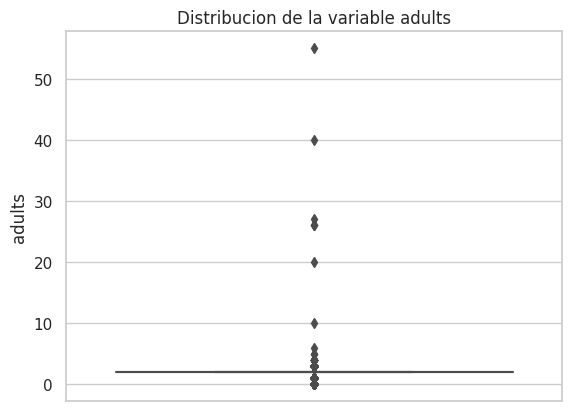

In [ ]:
sns.boxplot(data = df_copia, y = "adults").set(title = "Distribucion de la variable adults")

In [ ]:
df_copia['adults'].describe()

count    61765.000000
mean         1.861799
std          0.588905
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

Calculamos su Z-Score

In [ ]:
df_copia['zscore_adults'] = st.zscore(df_copia['adults'])
df_copia.loc[:,["adults", "zscore_adults"]]

,adults,zscore_adults
0,1,-1.463404
1,2,0.234677
2,2,0.234677
3,2,0.234677
4,2,0.234677
...,...,...
61908,2,0.234677
61909,1,-1.463404
61910,1,-1.463404
61911,2,0.234677


Observamos los límites:

In [ ]:
df_copia[df_copia['zscore_adults'] > 3].loc[:,["adults", "zscore_adults"]]

,adults,zscore_adults
2051,4,3.630838
2291,4,3.630838
3962,5,5.328919
4064,40,64.761740
4730,4,3.630838
11551,4,3.630838
11830,20,30.800128
12873,4,3.630838
13101,6,7.026999
17204,4,3.630838


In [ ]:
df_copia[df_copia['zscore_adults'] < -3].loc[:,["adults", "zscore_adults"]]

,adults,zscore_adults
96,0,-3.161484
212,0,-3.161484
270,0,-3.161484
326,0,-3.161484
464,0,-3.161484
...,...,...
59982,0,-3.161484
60837,0,-3.161484
60994,0,-3.161484
61003,0,-3.161484


In [ ]:
df_copia[df_copia['adults'] > 10].loc[:,["adults", "zscore_adults"]]

,adults,zscore_adults
4064,40,64.761740
11830,20,30.800128
19146,26,40.988612
38305,26,40.988612
55112,27,42.686692
59059,26,40.988612
59165,55,90.232950


Estos pocos registros contienen zscores extremadamente altos, y al ser tan pocos se pueden eliminar sin problema.

In [ ]:
df_copia.drop(df_copia[df_copia['adults'] > 10].index, inplace = True)

In [ ]:
df_copia['adults'].describe()

count    61758.000000
mean         1.858447
std          0.483424
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: adults, dtype: float64

In [ ]:
df_copia[df_copia['adults'] == 0].loc[:,["adults", "zscore_adults"]]

,adults,zscore_adults
96,0,-3.161484
212,0,-3.161484
270,0,-3.161484
326,0,-3.161484
464,0,-3.161484
...,...,...
59982,0,-3.161484
60837,0,-3.161484
60994,0,-3.161484
61003,0,-3.161484


Luego decidiremos que hacer con estas filas.

In [ ]:
df_copia.drop("zscore_adults", axis = 1, inplace = True)

#### Children

[Text(0.5, 1.0, 'Distribucion de la variable children'),
 Text(0.5, 0, 'Children')]

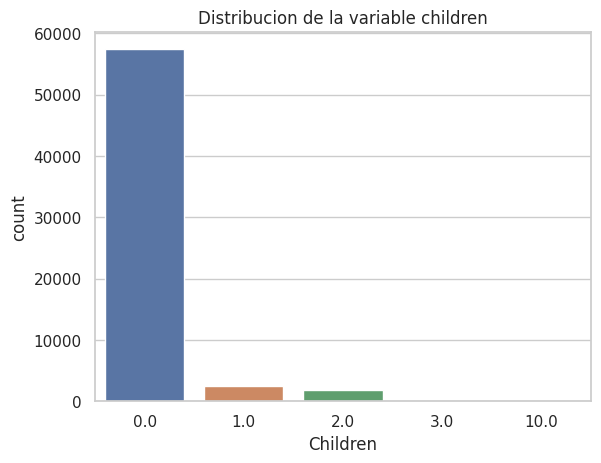

In [ ]:
sns.countplot(data = df_copia, x = "children").set(title = "Distribucion de la variable children", xlabel = "Children")

[Text(0.5, 1.0, 'Distribucion de la variable children')]

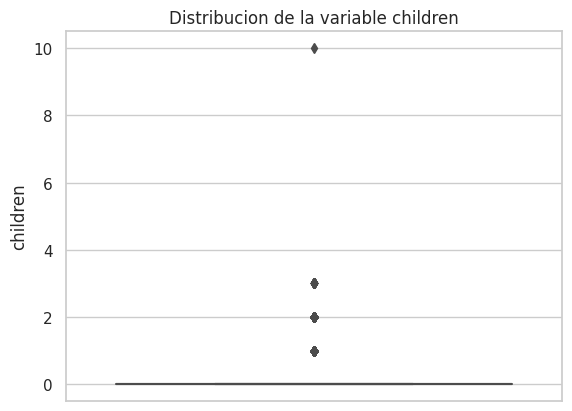

In [ ]:
sns.boxplot(data = df_copia, y = "children").set(title = "Distribucion de la variable children")

In [ ]:
df_copia['children'].describe()

count    61758.000000
mean         0.102351
std          0.397867
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

Calculamos su Z-Score

In [ ]:
df_copia['zscore_children'] = st.zscore(df_copia['children'])
df_copia.loc[:,["children", "zscore_children"]]

,children,zscore_children
0,0.0,-0.257251
1,0.0,-0.257251
2,2.0,4.769590
3,0.0,-0.257251
4,0.0,-0.257251
...,...,...
61908,0.0,-0.257251
61909,0.0,-0.257251
61910,0.0,-0.257251
61911,0.0,-0.257251


Miramos los extremos:

In [ ]:
df_copia[df_copia['zscore_children'] > 7].loc[:,["children", "zscore_children"]]

,children,zscore_children
481,3.0,7.283010
669,3.0,7.283010
772,3.0,7.283010
5549,3.0,7.283010
5915,3.0,7.283010
8197,3.0,7.283010
9054,3.0,7.283010
11077,3.0,7.283010
12446,3.0,7.283010
16154,3.0,7.283010


Elegimos un Z más grande ya que 3 toma valores de "children" bastante normales. Al ser muy pocos registros los borramos.

In [ ]:
df_copia.drop(df_copia[df_copia['zscore_children'] > 7].index, inplace = True)

In [ ]:
df_copia[df_copia['zscore_children'] < -3]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled,zscore_children


In [ ]:
df_copia.drop("zscore_children", axis = 1, inplace = True)

In [ ]:
df_copia['children'].describe()

count    61720.000000
mean         0.100454
std          0.389579
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: children, dtype: float64

#### Babies

[Text(0.5, 1.0, 'Distribucion de la variable babies'), Text(0.5, 0, 'Babies')]

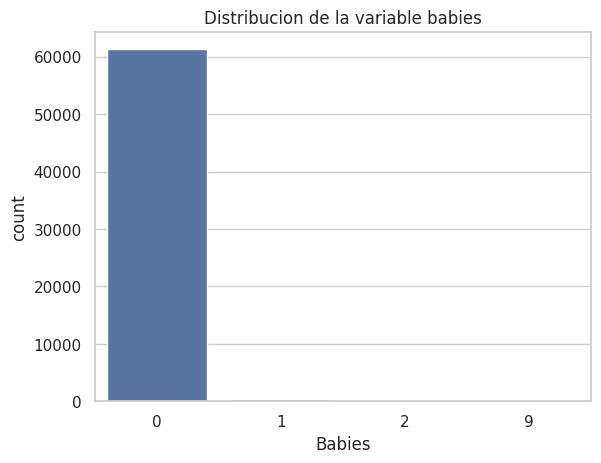

In [ ]:
sns.countplot(data = df_copia, x = "babies").set(title = "Distribucion de la variable babies", xlabel = "Babies")

[Text(0.5, 1.0, 'Distribucion de la variable babies')]

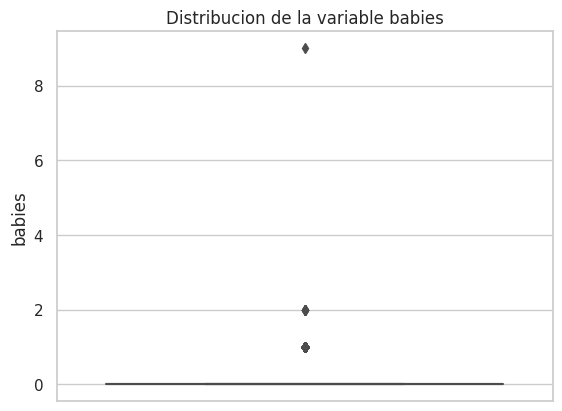

In [ ]:
sns.boxplot(data = df_copia, y = "babies").set(title = "Distribucion de la variable babies")

In [ ]:
df_copia['babies'].describe()

count    61720.000000
mean         0.007113
std          0.091955
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: babies, dtype: float64

Calculamos el Z-Score

In [ ]:
df_copia['zscore_babies'] = st.zscore(df_copia['babies'])
df_copia.loc[:,["babies", "zscore_babies"]]

,babies,zscore_babies
0,0,-0.077351
1,0,-0.077351
2,0,-0.077351
3,0,-0.077351
4,0,-0.077351
...,...,...
61908,0,-0.077351
61909,0,-0.077351
61910,0,-0.077351
61911,0,-0.077351


In [ ]:
df_copia[df_copia['zscore_babies'] > 11].loc[:,["babies", "zscore_babies"]]

,babies,zscore_babies
6675,2,21.672619
12659,9,97.797515
14391,2,21.672619
38639,2,21.672619
47353,2,21.672619
47646,2,21.672619
48607,2,21.672619
50487,2,21.672619


Al igual que con "children" son tan pocos registros que se pueden eliminar sin problemas.

In [ ]:
df_copia.drop(df_copia[df_copia['zscore_babies'] > 11].index, inplace = True)

In [ ]:
df_copia[df_copia['zscore_babies'] < -3].loc[:,["babies", "zscore_babies"]]

,babies,zscore_babies


In [ ]:
df_copia.drop("zscore_babies", axis = 1, inplace = True)

In [ ]:
df_copia['babies'].describe()

count    61712.000000
mean         0.006741
std          0.081827
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: babies, dtype: float64

### Caso Previous cancellations

[Text(0.5, 1.0, 'Distribucion de la variable previous_cancellations'),
 Text(0.5, 0, 'Previous cancellations')]

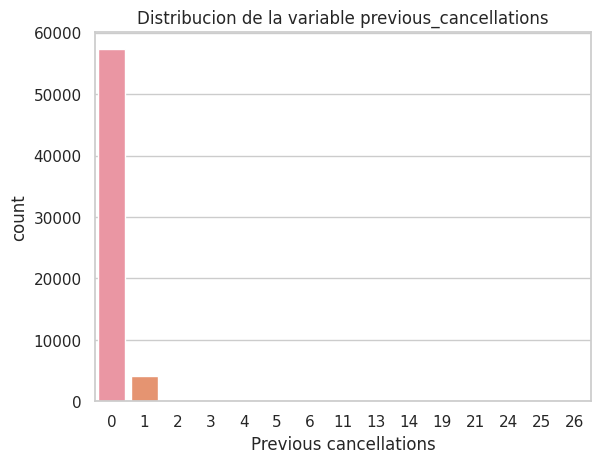

In [ ]:
sns.countplot(data = df_copia, x = "previous_cancellations").set(title = "Distribucion de la variable previous_cancellations", xlabel = "Previous cancellations")

[Text(0.5, 1.0, 'Distribucion de la variable previous_cancellations')]

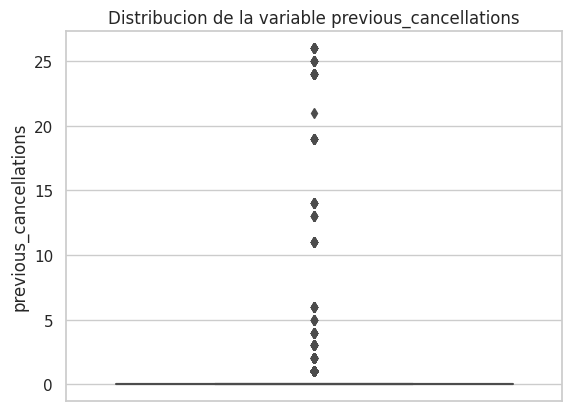

In [ ]:
sns.boxplot(data = df_copia, y = "previous_cancellations").set(title = "Distribucion de la variable previous_cancellations")

In [ ]:
df_copia['previous_cancellations'].describe()

count    61712.000000
mean         0.115164
std          0.995318
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

Calculamos su Z-Score

In [ ]:
df_copia['z_prev_cancel'] = st.zscore(df_copia['previous_cancellations'])
df_copia.loc[:,["previous_cancellations", "z_prev_cancel"]]

,previous_cancellations,z_prev_cancel
0,0,-0.115707
1,0,-0.115707
2,0,-0.115707
3,0,-0.115707
4,0,-0.115707
...,...,...
61908,0,-0.115707
61909,0,-0.115707
61910,0,-0.115707
61911,0,-0.115707


Analizo los Scores borde:

In [ ]:
df_copia[df_copia['z_prev_cancel'] > 3].loc[:,["previous_cancellations", "z_prev_cancel"]]

,previous_cancellations,z_prev_cancel
152,26,26.006801
337,19,18.973818
349,4,3.903141
802,26,26.006801
1579,11,10.936124
...,...,...
59717,14,13.950259
59761,24,23.997378
59879,11,10.936124
60138,25,25.002090


Decidimos mantenerlas por ahora

In [ ]:
df_copia[df_copia['z_prev_cancel'] < -3].loc[:,["previous_cancellations", "z_prev_cancel"]]

,previous_cancellations,z_prev_cancel


In [ ]:
df_copia.drop("z_prev_cancel", axis = 1, inplace = True)

### Caso Previous bookings not canceled

[Text(0.5, 1.0, 'Distribución de la variable previous_bookings_not_canceled')]

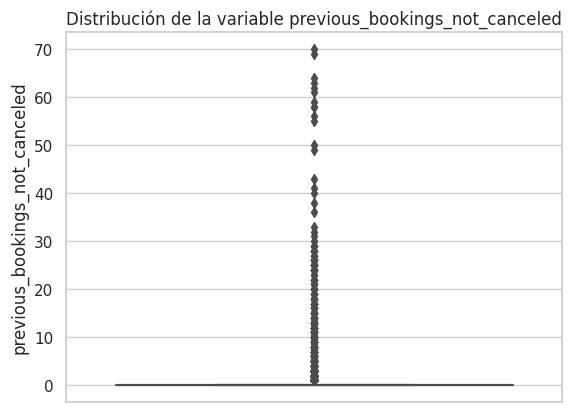

In [ ]:
sns.boxplot(df_copia, y = "previous_bookings_not_canceled").set(title = 'Distribución de la variable previous_bookings_not_canceled')

In [ ]:
df_copia['previous_bookings_not_canceled'].describe()

count    61712.000000
mean         0.115731
std          1.398598
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: previous_bookings_not_canceled, dtype: float64

In [ ]:
Q1 = np.quantile(df_copia['previous_bookings_not_canceled'],0.25)
Q3 = np.quantile(df_copia['previous_bookings_not_canceled'],0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

print(min)
print(max)

0.0
0.0


Elegimos un número de corte relativamente alto

In [ ]:
df_copia[df_copia['previous_bookings_not_canceled'] > 15]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
349,City Hotel,1,2017,July,27,5,0,1,1,0.0,...,NaN,45.0,0,Transient,95.0,0,3,2017-07-05,25855dea-20fc-4804-8549-39203b04a494,1
1579,City Hotel,190,2016,April,15,9,1,1,2,0.0,...,NaN,NaN,31,Transient-Party,70.0,0,0,2015-12-09,89c0e220-c141-4640-bf2e-6d09b4b5a9da,1
1661,Resort Hotel,0,2017,April,15,11,0,1,1,0.0,...,88.0,NaN,0,Transient,45.0,0,0,2017-04-12,93e70427-5d1a-444f-969e-2cccd4e69312,0
1882,City Hotel,0,2017,August,33,15,0,1,1,0.0,...,NaN,45.0,0,Transient,95.0,0,3,2017-08-16,485e75c9-3e37-46ef-8ab4-07f49af78146,0
2862,Resort Hotel,0,2016,May,19,4,0,1,1,0.0,...,47.0,NaN,0,Transient,42.0,0,0,2016-05-05,399ecdf7-5e5a-4d65-8608-d95a6a7235cc,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56141,City Hotel,8,2016,July,31,28,0,1,1,0.0,...,NaN,40.0,0,Transient,65.0,0,1,2016-07-29,fe04be93-71e0-48e7-adbb-d12dc0fb2d43,0
56240,City Hotel,6,2017,May,21,22,1,1,1,0.0,...,NaN,40.0,0,Transient,65.0,0,1,2017-05-24,d4bbf586-4752-498d-a5e9-2e71d5b8fb95,0
56636,Resort Hotel,10,2017,April,16,20,0,1,1,0.0,...,NaN,154.0,0,Transient,45.0,0,0,2017-04-21,4a8e748a-1670-4a8c-84b1-6bed9cf154fc,0
57247,Resort Hotel,1,2016,June,25,15,0,1,1,0.0,...,NaN,204.0,0,Transient,65.0,0,0,2016-06-16,d6b1c6e3-679d-40b9-a76f-5c27b1f5996c,0


Al ser pocos registros podemos eliminarlos.

In [ ]:
df_copia = df_copia.drop(df_copia[df_copia['previous_bookings_not_canceled'] > 15].index)

In [ ]:
df_copia['previous_bookings_not_canceled'].describe()

count    61620.000000
mean         0.072996
std          0.669041
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: previous_bookings_not_canceled, dtype: float64

[Text(0.5, 1.0, 'Distribución de la variable previous_bookings_not_canceled')]

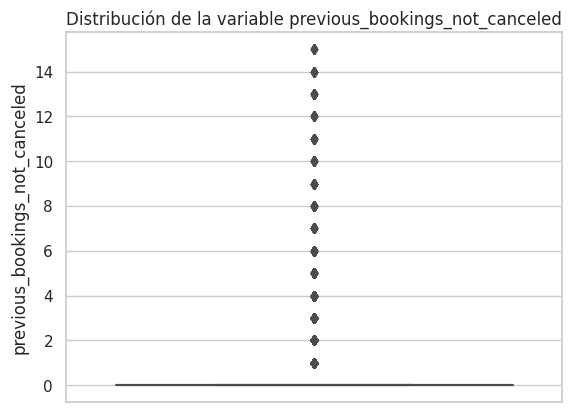

In [ ]:
sns.boxplot(df_copia, y = "previous_bookings_not_canceled").set(title = 'Distribución de la variable previous_bookings_not_canceled')

### Caso Booking changes

[Text(0.5, 1.0, 'Distribucion de la variable booking_changes'),
 Text(0.5, 0, 'Booking changes')]

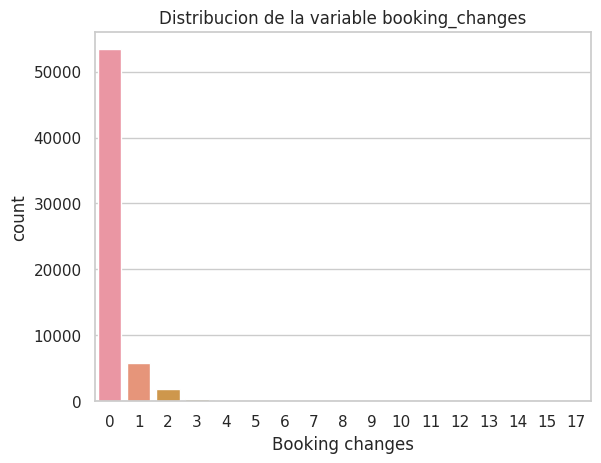

In [ ]:
sns.countplot(data = df_copia, x = "booking_changes").set(title = "Distribucion de la variable booking_changes", xlabel = "Booking changes")

[Text(0.5, 1.0, 'Distribucion de la variable booking_changes')]

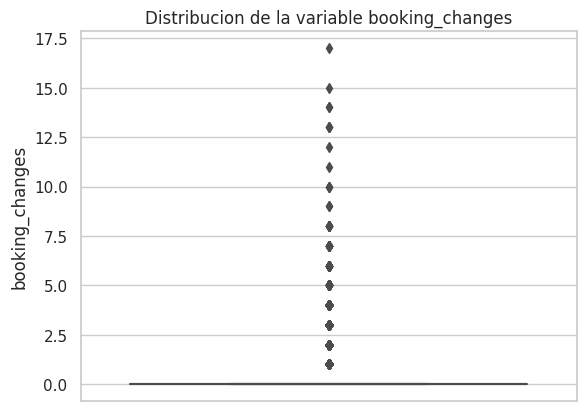

In [ ]:
sns.boxplot(data = df_copia, y = "booking_changes").set(title = "Distribucion de la variable booking_changes")

In [ ]:
df_copia['booking_changes'].describe()

count    61620.000000
mean         0.194628
std          0.607366
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64

In [ ]:
Q1 = np.quantile(df_copia['booking_changes'],0.25)
Q3 = np.quantile(df_copia['booking_changes'],0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

print(min)
print(max)

0.0
0.0


Elegimos un número de corte más alto que el máximo del boxplot.

In [ ]:
df_copia[df_copia['booking_changes'] > 8]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
1369,City Hotel,159,2016,May,22,26,0,3,1,0.0,...,9.0,NaN,0,Transient,119.85,0,1,2016-05-29,f6136dee-67ba-4e94-8f25-d14b916d3a7f,0
8019,Resort Hotel,206,2016,October,44,27,2,5,2,0.0,...,240.0,NaN,0,Transient,53.79,0,1,2016-07-25,11aab0bd-1c8b-4710-a6b7-ee7ef8006893,1
9282,City Hotel,2,2017,August,31,3,0,1,2,1.0,...,509.0,NaN,0,Transient-Party,216.50,0,1,2017-08-04,92a56bfd-b783-4656-b90d-894b76d40622,0
15575,Resort Hotel,101,2016,April,18,29,2,5,2,0.0,...,95.0,NaN,0,Transient-Party,75.00,0,0,2016-05-06,efffaa8e-f35d-4d6b-b849-9f8d869d5ffc,0
23024,Resort Hotel,99,2016,April,18,27,2,7,2,0.0,...,95.0,NaN,0,Transient-Party,71.89,0,0,2016-05-06,614d0375-83c8-409a-8819-c27aff4a9c99,0
24041,City Hotel,159,2016,May,22,26,0,3,1,0.0,...,9.0,NaN,0,Transient-Party,187.85,0,0,2016-05-16,db448d69-fc46-41fd-92e7-37084355de3a,1
26022,City Hotel,159,2016,May,22,26,0,3,2,1.0,...,9.0,NaN,0,Transient,119.85,0,1,2016-05-29,b049ced8-dbab-447b-9f21-2ca5b1bcd8c3,0
34040,Resort Hotel,149,2017,July,30,25,8,21,2,0.0,...,240.0,NaN,0,Transient,95.00,0,0,2017-08-23,a0adf40b-3b40-4019-ab4a-52a269a22b7c,0
40825,Resort Hotel,101,2016,April,18,29,2,3,2,0.0,...,95.0,NaN,0,Transient-Party,75.00,0,1,2016-05-04,32104acb-4eb9-42ba-b4a5-3861561a8734,0
46642,City Hotel,159,2016,May,22,26,0,3,2,1.0,...,9.0,NaN,0,Transient,119.85,0,1,2016-05-29,503098f2-88ef-4de1-81a6-626e263ee313,0


Al ser una cantidad despreciable eliminamos las filas.

In [ ]:
df_copia = df_copia.drop(df_copia[df_copia['booking_changes'] > 8].index)

In [ ]:
df_copia['booking_changes'].describe()

count    61606.000000
mean         0.191913
std          0.579049
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: booking_changes, dtype: float64

[Text(0.5, 1.0, 'Distribucion de la variable booking_changes')]

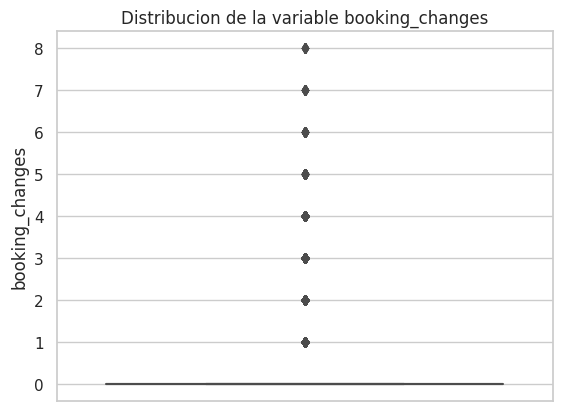

In [ ]:
sns.boxplot(data = df_copia, y = "booking_changes").set(title = "Distribucion de la variable booking_changes")

### Caso Parking spaces

[Text(0.5, 1.0, 'Distribucion de la variable parking_spaces'),
 Text(0.5, 0, 'Parking Spaces')]

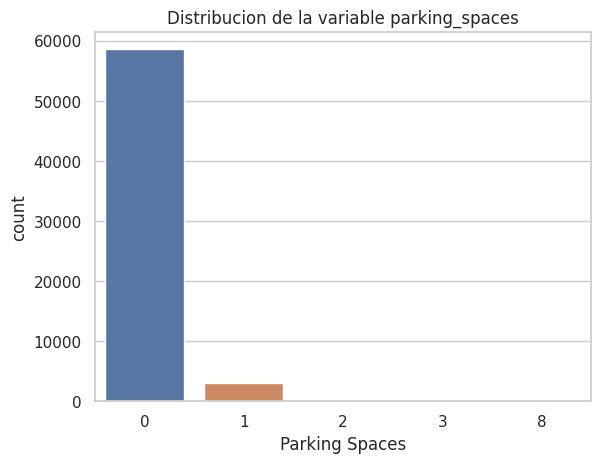

In [ ]:
sns.countplot(data = df_copia, x = "parking_spaces").set(title = "Distribucion de la variable parking_spaces", xlabel = "Parking Spaces")

[Text(0.5, 1.0, 'Distribucion de la variable parking_spaces')]

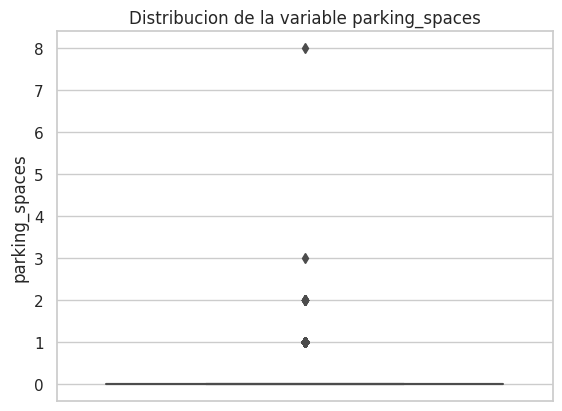

In [ ]:
sns.boxplot(data = df_copia, y = "parking_spaces").set(title = "Distribucion de la variable parking_spaces")

In [ ]:
df_copia['parking_spaces'].describe()

count    61606.000000
mean         0.049330
std          0.219757
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: parking_spaces, dtype: float64

In [ ]:
df_copia[df_copia['parking_spaces'] > 2]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
8269,Resort Hotel,138,2017,March,12,19,2,2,2,0.0,...,NaN,NaN,122,Transient-Party,80.0,8,0,2017-03-23,174365a6-2548-48c4-ae12-7842d5498f12,0
13713,Resort Hotel,205,2017,June,26,26,3,10,2,0.0,...,250.0,NaN,0,Transient,111.0,3,0,2017-07-09,4267af65-0a89-4489-b099-e0332c6c51fe,0


Como son 2 registros los eliminamos

In [ ]:
df_copia = df_copia.drop(df_copia[df_copia['parking_spaces'] > 2].index)

In [ ]:
df_copia['parking_spaces'].describe()

count    61604.000000
mean         0.049153
std          0.217088
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: parking_spaces, dtype: float64

[Text(0.5, 1.0, 'Distribucion de la variable parking_spaces')]

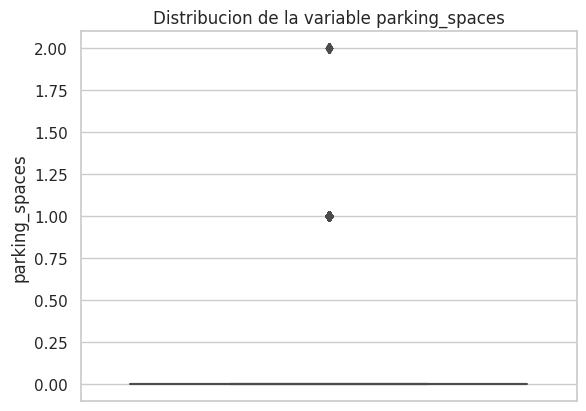

In [ ]:
sns.boxplot(data = df_copia, y = "parking_spaces").set(title = "Distribucion de la variable parking_spaces")

## Análisis multivariado

**Ahora vamos a analizar las relaciones entre algunas variables para ver si podemos encontrar valores atípicos.**

Empezamos analizando las variables "week_nights" y "weekend_nights"

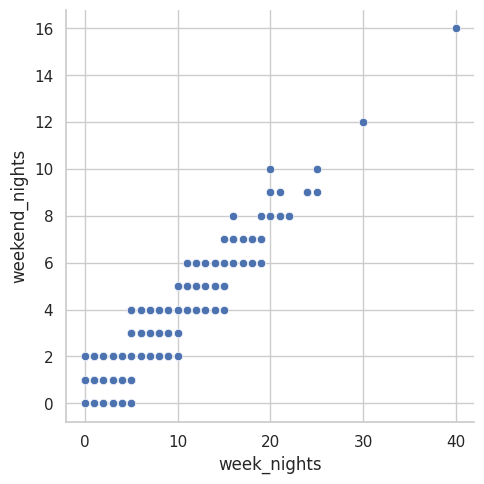

In [ ]:
sns.relplot(df_copia, x = "week_nights", y = "weekend_nights")

Podemos notar en el gráfico un valor atípico muy claro.

In [ ]:
df_copia[df_copia['week_nights'] >= 40].loc[:, ['week_nights', 'weekend_nights']]

,week_nights,weekend_nights
31310,40,16


Eliminamos el valor

In [ ]:
df_copia.drop(df_copia[df_copia['week_nights'] >= 40].index, inplace = True)

In [ ]:
df_copia[(df_copia['weekend_nights'] == 0) & (df_copia['week_nights'] == 0) ]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
393,City Hotel,0,2016,May,21,17,0,0,2,0.0,...,6.0,NaN,0,Transient,95.0,0,0,2016-05-17,02a4c88e-79b0-4afe-9f21-39dcbcb977ad,0
1131,Resort Hotel,0,2017,February,7,12,0,0,1,0.0,...,240.0,NaN,0,Transient,95.0,0,0,2017-02-12,833c0f31-dedd-4cc5-9baa-5ffbc0ac1011,1
1454,Resort Hotel,1,2015,October,43,21,0,0,1,0.0,...,NaN,286.0,0,Transient,95.0,0,0,2015-10-21,759a6c13-88d0-4522-bf3b-a815d7f581f4,0
1551,City Hotel,32,2016,November,47,15,0,0,1,0.0,...,7.0,NaN,0,Transient,95.0,0,1,2016-11-15,0d630779-e22a-400b-9c09-10586ffceab3,0
1731,Resort Hotel,0,2017,May,19,8,0,0,2,0.0,...,NaN,NaN,0,Transient,95.0,0,0,2017-05-08,d537e8ad-9ddd-453d-83b4-41f8a3a8487f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60941,City Hotel,0,2015,November,48,23,0,0,2,0.0,...,8.0,NaN,0,Transient,95.0,0,0,2015-11-23,f5c99bf4-1a25-484e-ae35-025fc9e8f0d0,0
61008,City Hotel,36,2016,July,30,20,0,0,2,2.0,...,9.0,NaN,0,Transient,95.0,0,3,2016-07-20,f09a0405-93f7-4a9e-b2a1-67338872a801,0
61180,City Hotel,1,2017,June,26,28,0,0,1,0.0,...,NaN,153.0,0,Transient,95.0,0,0,2017-06-28,57d6de79-992a-4143-a4c8-3ce6613449b5,0
61514,Resort Hotel,1,2016,February,8,16,0,0,2,0.0,...,NaN,NaN,0,Transient,95.0,1,0,2016-02-16,120d6128-d09e-4f46-a2f2-2a8814304739,0


Encontramos que hay 297 registros donde tanto "week_nights" como "weekend_nights" valen 0. 

In [ ]:
print(f"El porcentaje de la muestra con respecto al dataframe es de {len(df_copia[(df_copia['weekend_nights'] == 0) & (df_copia['week_nights'] == 0)])*100 / len(df_copia['week_nights'])}%.")

El porcentaje de la muestra con respecto al dataframe es de 0.48211937730305343%.


Si bien es una cantidad bastante despreciable, no podemos eliminar los registros. Así reemplazamos los valores por su mediana.

In [ ]:
df_copia['week_nights'] = df_copia['week_nights'].replace(0,np.median(df_copia['week_nights']))
df_copia['weekend_nights'] = df_copia['weekend_nights'].replace(0,np.median(df_copia['weekend_nights']))

In [ ]:
df_copia['week_nights'].describe()

count    61603.000000
mean         2.628232
std          1.774721
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: week_nights, dtype: float64

In [ ]:
df_copia['weekend_nights'].describe()

count    61603.000000
mean         1.360616
std          0.648914
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: weekend_nights, dtype: float64